# ML Factor analysis

#### Default import 

(not all deployed)

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from pandas import Series, ExcelWriter
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.datasets import make_regression
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
import random
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, make_scorer, roc_curve, f1_score
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score,r2_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_predict
from sklearn.model_selection import cross_validate, ShuffleSplit, learning_curve
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import warnings
from sklearn.ensemble import AdaBoostClassifier
warnings.filterwarnings("ignore")
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import NuSVC
import xlwt
from openpyxl import load_workbook
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
pd.set_option('display.max_rows', 1000)
from sklearn.utils.multiclass import unique_labels

## 1) Gathering and preparing data

#### Read the dataset

In [2]:
df = pd.read_excel('dataSandwichDef.xlsx')
df

REF_DATE SEDOLCHK  SIMPLE_TOT_RET  COMPOUND_TOT_RET  \
0       20050429  0028262        0.014546          0.015183   
1       20050429  0038614        0.043240          0.043240   
2       20050429  0044473        0.043979          0.043979   
3       20050429  0045614        0.062633          0.064127   
4       20050429  0047245        0.063380          0.063380   
5       20050429  0056434        0.059750          0.059750   
6       20050429  0059585        0.127937          0.127937   
7       20050429  0067340        0.074202          0.074202   
8       20050429  0068707        0.127472          0.127472   
9       20050429  0081180        0.107563          0.107563   
10      20050429  0090498        0.115183          0.115183   
11      20050429  0096162        0.061576          0.061576   
12      20050429  0108120        0.037113          0.037113   
13      20050429  0136701        0.064181          0.064181   
14      20050429  0141192        0.010185          0.010185   
15      20050429  0142162        0.005634          0.005634   
16      20050429  0143002        0.146418          0.146418   
17      20050429  0145279       -0.008737         -0.008737   
18      20050429  0150080        0.042122          0.042122   
19      20050429  0180366        0.049464          0.049464   
20      20050429  0185929        0.101449          0.101449   
21      20050429  0191539       -0.007306         -0.007419   
22      20050429  0216238        0.045840          0.045840   
23      20050429  0222815        0.014791          0.014791   
24      20050429  0230346        0.053465          0.053465   
25      20050429  0237400        0.021318          0.021318   
26      20050429  0240549        0.121302          0.121302   
27      20050429  0250281        0.095183          0.095183   
28      20050429  0263494        0.054848          0.054848   
29      20050429  0287580        0.067485          0.067485   
30      20050429  0309644        0.133696          0.133696   
31      20050429  0329459        0.034853          0.034853   
32      20050429  0330860        0.062105          0.062540   
33      20050429  0331841        0.128162          0.129069   
34      20050429  0345217       -0.003140         -0.003140   
35      20050429  0383369        0.043050          0.043050   
36      20050429  0405207        0.000000          0.000000   
37      20050429  0406501        0.067687          0.067687   
38      20050429  0408284        0.060638          0.060638   
39      20050429  0416102       -0.046065         -0.046065   
40      20050429  0434256        0.128319          0.128319   
41      20050429  0448688        0.032238          0.032238   
42      20050429  0454492       -0.004013         -0.004013   
43      20050429  0459497        0.009930          0.009930   
44      20050429  0483548        0.091026          0.091026   
45      20050429  0514523        0.025959          0.025959   
46      20050429  0520337        0.024890          0.024890   
47      20050429  0522708        0.041348          0.041348   
48      20050429  0540528        0.048033          0.048071   
49      20050429  0557681        0.073892          0.073984   
50      20050429  0560399        0.040767          0.040767   
51      20050429  0575809        0.134952          0.134952   
52      20050429  0604316       -0.025773         -0.025773   
53      20050429  0621520        0.032124          0.032124   
54      20050429  0632016        0.075446          0.076096   
55      20050429  0646608        0.019512          0.019512   
56      20050429  0673123        0.090599          0.090599   
57      20050429  0677608        0.037795          0.037795   
58      20050429  0680048        0.155494          0.155494   
59      20050429  0682538        0.105769          0.105769   
60      20050429  0683434        0.036017          0.036017   
61      20050429  0688462        0.071759          0.071759   
62      20050429  0709954        0.0393

#### Initially, the DataFrame' shape is:

In [3]:
df.shape

(102186, 71)

#### A brief descriptive statistics

In [4]:
df.describe()

REF_DATE  SIMPLE_TOT_RET  COMPOUND_TOT_RET  FIVE_YR_VOLATILITY_M  \
count  1.021860e+05   102123.000000     102123.000000         102117.000000   
mean   2.011952e+07        0.007547          0.007559              0.294503   
std    4.130217e+04        0.089001          0.089089              0.122787   
min    2.005043e+07       -0.966300         -0.966300              0.004800   
25%    2.008103e+07       -0.037400         -0.037400              0.210600   
50%    2.012053e+07        0.009100          0.009100              0.266600   
75%    2.015123e+07        0.054900          0.055000              0.345800   
max    2.019063e+07        1.694300          1.694300              1.412344   

       FIVE_YR_VOLATILITY_W            ADY          AERR          AGRE  \
count         102166.000000  101725.000000  97696.000000  98359.000000   
mean               0.318929       0.032016      0.534007      0.100637   
std                0.123919       0.024878      0.251277      6.737749   
min                0.022600       0.000000      0.000000   -644.973400   
25%                0.236100       0.017300      0.395100     -0.045200   
50%                0.291300       0.028500      0.560800      0.077100   
75%                0.371300       0.042700      0.691600      0.209900   
max                2.517600       1.205400      1.000000    220.160300   

                APE           CGR  ...   REV_STD_MARK            ROE  \
count  98655.000000  91737.000000  ...  101522.000000  100096.000000   
mean      21.444112      0.087949  ...       0.000170       0.348933   
std      201.648041      0.161897  ...       0.048378      28.760040   
min        0.330000     -0.740100  ...      -2.176300     -63.500000   
25%       11.730000      0.011200  ...      -0.000300       0.092300   
50%       15.630000      0.076500  ...       0.000300       0.143900   
75%       20.943230      0.143300  ...       0.000800       0.206900   
max    38766.150000      2.504540  ...      13.427800    8831.764000   

             TRL_ECM       TRL_GRE    TURNOVER_1M       UL_SALES  \
count  100917.000000  99730.000000  102181.000000  100817.000000   
mean       -0.014937      0.274704      48.888685       0.312801   
std         6.082885      8.235621      87.572134      21.016170   
min     -1585.904000    -56.254700       0.189400    -215.900000   
25%        -0.020100      0.031900       9.128900       0.100000   
50%         0.019100      0.095500      20.311400       0.100000   
75%         0.056900      0.169300      49.226300       0.200000   
max       504.193800   1844.659000    2571.911000    6310.000000   

             PB/PCF1        PB/PCF2  ICB_INDUSTRY_NUM  ICB_SECTOR_NUM  
count  100402.000000   95690.000000     102186.000000   102186.000000  
mean       11.413676      19.358099       4546.132171     5123.688989  
std       182.832468    1502.180461       2766.850720     2739.592965  
min         0.030000       0.030000          1.000000      530.000000  
25%         3.510000       5.910000       2000.000000     2750.000000  
50%         7.980000       9.610000       4000.000000     4570.000000  
75%        12.710000      14.370000       8000.000000     8350.000000  
max     26172.750000  460769.000000       9000.000000     9570.000000  

[8 rows x 70 columns]

#### Info on the type of each column and the number of non-NaN values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102186 entries, 0 to 102185
Data columns (total 71 columns):
REF_DATE                 102186 non-null int64
SEDOLCHK                 102186 non-null object
SIMPLE_TOT_RET           102123 non-null float64
COMPOUND_TOT_RET         102123 non-null float64
FIVE_YR_VOLATILITY_M     102117 non-null float64
FIVE_YR_VOLATILITY_W     102166 non-null float64
ADY                      101725 non-null float64
AERR                     97696 non-null float64
AGRE                     98359 non-null float64
APE                      98655 non-null float64
CGR                      91737 non-null float64
CV3Y_EPS                 101932 non-null float64
CV3Y_EREV_FY1            101808 non-null float64
CV3Y_REP_EPS             102063 non-null float64
CV3Y_REV_MARK            101915 non-null float64
CV5Y_EPS                 101962 non-null float64
CV6M_P                   102180 non-null float64
CV6M_PM6M                101896 non-null float64
DEBT_MKT_CAP  

#### Percentage of NaN values in each column

In [33]:
df.isna().sum() / len(df)

REF_DATE                 0.000000
SEDOLCHK                 0.000000
SIMPLE_TOT_RET           0.000617
COMPOUND_TOT_RET         0.000617
FIVE_YR_VOLATILITY_M     0.000675
FIVE_YR_VOLATILITY_W     0.000196
ADY                      0.004511
AERR                     0.043939
AGRE                     0.037451
APE                      0.034555
CGR                      0.102255
CV3Y_EPS                 0.002486
CV3Y_EREV_FY1            0.003699
CV3Y_REP_EPS             0.001204
CV3Y_REV_MARK            0.002652
CV5Y_EPS                 0.002192
CV6M_P                   0.000059
CV6M_PM6M                0.002838
DEBT_MKT_CAP             0.119214
DY_FWD                   0.003229
DY_TRL                   0.003983
EBIT_SALES               0.050633
ECM                      0.011274
EEREV                    0.004922
EPS_SIGMA                0.012301
EPSDISP                  0.012673
EREV                     0.006165
F2GRE                    0.005392
FDY                      0.004003
FERR          

## Fixing Nan based on rules

### Rule 1: 
RF (i, j, t) = NA con j = SIMPLE_TOT_RET oppure j = COMPOUND_TOT_RET -->  si sopprime la coppia (i, t) su ogni j: si tratta di una company delistata al termpo t

In [6]:
df = df.dropna(subset = ['SIMPLE_TOT_RET', 'COMPOUND_TOT_RET']).reset_index().drop(['index'], axis = 1)
df.head()

REF_DATE SEDOLCHK  SIMPLE_TOT_RET  COMPOUND_TOT_RET  FIVE_YR_VOLATILITY_M  \
0  20050429  0028262        0.014546          0.015183              0.374144   
1  20050429  0038614        0.043240          0.043240              0.243429   
2  20050429  0044473        0.043979          0.043979              0.457628   
3  20050429  0045614        0.062633          0.064127              0.330014   
4  20050429  0047245        0.063380          0.063380              0.380265   

   FIVE_YR_VOLATILITY_W       ADY      AERR      AGRE        APE  ...  \
0              0.410857  0.034056  0.583228  0.038748  12.237950  ...   
1              0.240235  0.058831  0.424596  0.069312   9.780680  ...   
2              0.457729  0.033439  0.485167  0.058342  15.396250  ...   
3              0.296963  0.038021  0.720774  1.868184   7.344045  ...   
4              0.394760  0.049925  0.411554  0.040607  11.786590  ...   

   REV_STD_MARK       ROE   TRL_ECM   TRL_GRE  TURNOVER_1M  UL_SALES  \
0      0.000047  0.228026 -0.008689  0.039583     13.45278  0.025476   
1     -0.000095  0.203544  0.006073  0.033105     34.52257  0.409729   
2      0.000264       NaN -0.166107  0.168180     35.39919  0.072399   
3     -0.000095  0.270775 -0.021343 -0.174962     20.17821  0.602459   
4     -0.000490  0.165902  0.003204  0.036071     41.79630  0.049196   

     PB/PCF1    PB/PCF2  ICB_INDUSTRY_NUM  ICB_SECTOR_NUM  
0   6.840467   6.840467                 1             570  
1   1.914199   1.914199              8000            8350  
2  21.041570  21.041570              5000            5550  
3   5.907725   5.907725              1000            1770  
4   7.831871   7.831871              5000            5370  

[5 rows x 71 columns]

#### Now the DataFrame' shape is:

In [8]:
df.shape

(102123, 71)

##### Check on the presence on NaN on the SIMPLE_TOT_RET and COMPOUND_TOT_RET columns after the drop

In [11]:
(df[['SIMPLE_TOT_RET','COMPOUND_TOT_RET']].isna().sum())

SIMPLE_TOT_RET      0
COMPOUND_TOT_RET    0
dtype: int64

### Rule 2: 
RF(i, j, t) = NA per un fattore j su tutte le companies i ( o anche solo su un N companies >= 20% del campione) ad una specifica data t -->  si sopprime il fattore RF (per ogni j, i, t): si tratta di una variabile non calcolabile per mancanza di dati primi

#### Check on the number of periods where the number of NaN was higher that the 20% of the observations for each factor

In [12]:
pass_list = []
reject_list = []
for i in df.columns:
    check = sum(df.groupby(['REF_DATE'])[i].count() / df.groupby(['REF_DATE'])['REF_DATE'].count() < 0.8)
    print(i ,':', check)
    if check ==0:
        pass_list.append(i)
    else:
        reject_list.append(i)


REF_DATE : 0
SEDOLCHK : 0
SIMPLE_TOT_RET : 0
COMPOUND_TOT_RET : 0
FIVE_YR_VOLATILITY_M : 0
FIVE_YR_VOLATILITY_W : 0
ADY : 0
AERR : 0
AGRE : 0
APE : 0
CGR : 0
CV3Y_EPS : 0
CV3Y_EREV_FY1 : 0
CV3Y_REP_EPS : 0
CV3Y_REV_MARK : 0
CV5Y_EPS : 0
CV6M_P : 0
CV6M_PM6M : 0
DEBT_MKT_CAP : 0
DY_FWD : 0
DY_TRL : 0
EBIT_SALES : 0
ECM : 0
EEREV : 0
EPS_SIGMA : 0
EPSDISP : 0
EREV : 0
F2GRE : 0
FDY : 0
FERR : 0
FGRE : 0
FPE : 0
FWD_ECM : 0
FWD_GRE : 0
LRE : 0
MKT_CAP_SALES : 0
NM : 0
PB : 0
PM6MBIS : 0
PM6MTRIS : 0
PCF : 0
PCTCHG_DPS : 0
PCTCHG_EBIT : 0
PCTCHG_EBIT_MARGIN : 0
PCTCHG_EBITDA : 0
PCTCHG_EQUITY : 0
PCTCHG_NET_DEBT : 0
PCTCHG_NM : 0
PCTCHG_PRE_TAX_PROFIT : 0
PCTCHG_ROE : 0
PCTCHG_SALES : 0
PCTCHG_UL_SALES : 0
PE_FWD : 0
PE_TRL : 0
PM6M : 0
RC1MEEREV : 0
RC1MEREV : 0
REC_MARK_1M : 0
REC_MARK_3M : 0
REV_MARK_1M : 0
REV_MARK_3M : 0
REV_STD_MARK : 0
ROE : 0
TRL_ECM : 0
TRL_GRE : 0
TURNOVER_1M : 0
UL_SALES : 0
PB/PCF1 : 0
PB/PCF2 : 0
ICB_INDUSTRY_NUM : 0
ICB_SECTOR_NUM : 0


#### How many factors this operation has dropped?

In [13]:
len(df.columns) - len(pass_list)

0

#### Which factors have been dropped?

In [14]:
reject_list

[]

#### Now the DataFrame' shape is:

In [15]:
df = df[pass_list]
df.shape

(102123, 71)

### Rule 3: 
RF (i, j, t) = NA su ogni fattore j per una specifica company i -->  si sopprime RF per ogni j per lo specifico i (si sopprime la riga): si tratta di intervalli temporali cui l’indice era composto da 599 companies anziché 600

#### Check on the presence of  some full NaN rows 

In [16]:
old_l = len(df)
df = df.dropna(how = 'all')

if len(df) == old_l:
    print('All right')
else:
    print('There were still some full NaN rows. Run again, now should be fine')

All right


### Rule 4: 
RF(i, j, t) = NA  su specifico i , j, t -->  occorre sostituire il singolo dato senza sopprimere la company i su tutti i RF j e/o sui tempi t

#### Fill NaN with sectors' median of each t

The following function substitutes each NaN value of each company in each date with median of the respective sector of the respective period 

In [17]:
for i in df.columns[2:-2]:
    df[i] = df.groupby(['REF_DATE','ICB_INDUSTRY_NUM'])[i].transform(lambda x: x.fillna(x.median()))
    
df

REF_DATE SEDOLCHK  SIMPLE_TOT_RET  COMPOUND_TOT_RET  \
0       20050429  0028262        0.014546          0.015183   
1       20050429  0038614        0.043240          0.043240   
2       20050429  0044473        0.043979          0.043979   
3       20050429  0045614        0.062633          0.064127   
4       20050429  0047245        0.063380          0.063380   
5       20050429  0056434        0.059750          0.059750   
6       20050429  0059585        0.127937          0.127937   
7       20050429  0067340        0.074202          0.074202   
8       20050429  0068707        0.127472          0.127472   
9       20050429  0081180        0.107563          0.107563   
10      20050429  0090498        0.115183          0.115183   
11      20050429  0096162        0.061576          0.061576   
12      20050429  0108120        0.037113          0.037113   
13      20050429  0136701        0.064181          0.064181   
14      20050429  0141192        0.010185          0.010185   
15      20050429  0142162        0.005634          0.005634   
16      20050429  0143002        0.146418          0.146418   
17      20050429  0145279       -0.008737         -0.008737   
18      20050429  0150080        0.042122          0.042122   
19      20050429  0180366        0.049464          0.049464   
20      20050429  0185929        0.101449          0.101449   
21      20050429  0191539       -0.007306         -0.007419   
22      20050429  0216238        0.045840          0.045840   
23      20050429  0222815        0.014791          0.014791   
24      20050429  0230346        0.053465          0.053465   
25      20050429  0237400        0.021318          0.021318   
26      20050429  0240549        0.121302          0.121302   
27      20050429  0250281        0.095183          0.095183   
28      20050429  0263494        0.054848          0.054848   
29      20050429  0287580        0.067485          0.067485   
30      20050429  0309644        0.133696          0.133696   
31      20050429  0329459        0.034853          0.034853   
32      20050429  0330860        0.062105          0.062540   
33      20050429  0331841        0.128162          0.129069   
34      20050429  0345217       -0.003140         -0.003140   
35      20050429  0383369        0.043050          0.043050   
36      20050429  0405207        0.000000          0.000000   
37      20050429  0406501        0.067687          0.067687   
38      20050429  0408284        0.060638          0.060638   
39      20050429  0416102       -0.046065         -0.046065   
40      20050429  0434256        0.128319          0.128319   
41      20050429  0448688        0.032238          0.032238   
42      20050429  0454492       -0.004013         -0.004013   
43      20050429  0459497        0.009930          0.009930   
44      20050429  0483548        0.091026          0.091026   
45      20050429  0514523        0.025959          0.025959   
46      20050429  0520337        0.024890          0.024890   
47      20050429  0522708        0.041348          0.041348   
48      20050429  0540528        0.048033          0.048071   
49      20050429  0557681        0.073892          0.073984   
50      20050429  0560399        0.040767          0.040767   
51      20050429  0575809        0.134952          0.134952   
52      20050429  0604316       -0.025773         -0.025773   
53      20050429  0621520        0.032124          0.032124   
54      20050429  0632016        0.075446          0.076096   
55      20050429  0646608        0.019512          0.019512   
56      20050429  0673123        0.090599          0.090599   
57      20050429  0677608        0.037795          0.037795   
58      20050429  0680048        0.155494          0.155494   
59      20050429  0682538        0.105769          0.105769   
60      20050429  0683434        0.036017          0.036017   
61      20050429  0688462        0.071759          0.071759   
62      20050429  0709954        0.0393

#### Check if there are still some NaN

In [18]:
if df.isna().sum().sum() == 0:
    print('no NaN')
else:
    print('still some Nan')

no NaN


### Rule 5: 
RF(i, j, t) = outlier su specifico i, j, t -->  si applicano regole di data cleaning della tabella “LEGENDA”  sullo specifico i, j, t

#### Winsorization to lower quantile = 5% and upper quantile = 0.95%

The following function substitutes each value below/above the boundary of each company in each t with the boundary's value

In [19]:
for i in df.columns[2:-2]:
    df[i] = df.groupby(['REF_DATE','ICB_INDUSTRY_NUM'])[i].transform(lambda x: x.clip(np.quantile(x, 0.05), np.quantile(x, 0.95)))




#### After all the curation, the dataset is:

In [20]:
df.head()

REF_DATE SEDOLCHK  SIMPLE_TOT_RET  COMPOUND_TOT_RET  FIVE_YR_VOLATILITY_M  \
0  20050429  0028262        0.014546          0.015183              0.374144   
1  20050429  0038614        0.043240          0.043240              0.243429   
2  20050429  0044473        0.043979          0.043979              0.457628   
3  20050429  0045614        0.062633          0.064127              0.330014   
4  20050429  0047245        0.063380          0.063380              0.380265   

   FIVE_YR_VOLATILITY_W       ADY      AERR      AGRE        APE  ...  \
0              0.410857  0.034056  0.583228  0.038748  12.237950  ...   
1              0.240235  0.056665  0.424596  0.069312   9.780680  ...   
2              0.457729  0.033439  0.485167  0.058342  15.396250  ...   
3              0.296963  0.038021  0.720774  1.868184   7.344045  ...   
4              0.394760  0.049925  0.411554  0.040607  11.786590  ...   

   REV_STD_MARK       ROE   TRL_ECM   TRL_GRE  TURNOVER_1M  UL_SALES  \
0      0.000047  0.228026 -0.008689  0.039583     13.45278  0.028943   
1     -0.000095  0.203544  0.006073  0.033105     34.52257  0.409729   
2      0.000264  0.161368 -0.062655  0.168180     35.39919  0.072399   
3     -0.000095  0.270775 -0.021343 -0.136258     20.17821  0.321038   
4     -0.000490  0.165902  0.003204  0.036071     41.79630  0.049196   

     PB/PCF1    PB/PCF2  ICB_INDUSTRY_NUM  ICB_SECTOR_NUM  
0   6.840467   6.840467                 1             570  
1   1.914199   1.914199              8000            8350  
2  16.924844  16.924844              5000            5550  
3   5.907725   5.907725              1000            1770  
4   7.831871   7.831871              5000            5370  

[5 rows x 71 columns]

### Save clean Dataframe into pickle file

Export clean dataframe into a pickle file.

In [1]:
df.to_pickle('dataSandwichDef.pickle')

NameError: name 'df' is not defined

## 2) Data Analysis


Get some information about data.

In [88]:
df=pd.read_pickle('dataSandwichDef.pickle')
df.head()

REF_DATE SEDOLCHK  SIMPLE_TOT_RET  COMPOUND_TOT_RET  FIVE_YR_VOLATILITY_M  \
0  20050429  0028262        0.014546          0.015183              0.374144   
1  20050429  0038614        0.043240          0.043240              0.243429   
2  20050429  0044473        0.043979          0.043979              0.457628   
3  20050429  0045614        0.062633          0.064127              0.330014   
4  20050429  0047245        0.063380          0.063380              0.380265   

   FIVE_YR_VOLATILITY_W       ADY      AERR      AGRE        APE  ...  \
0              0.410857  0.034056  0.583228  0.038748  12.237950  ...   
1              0.240235  0.056665  0.424596  0.069312   9.780680  ...   
2              0.457729  0.033439  0.485167  0.058342  15.396250  ...   
3              0.296963  0.038021  0.720774  1.868184   7.344045  ...   
4              0.394760  0.049925  0.411554  0.040607  11.786590  ...   

   REV_STD_MARK       ROE   TRL_ECM   TRL_GRE  TURNOVER_1M  UL_SALES  \
0      0.000047  0.228026 -0.008689  0.039583     13.45278  0.028943   
1     -0.000095  0.203544  0.006073  0.033105     34.52257  0.409729   
2      0.000264  0.161368 -0.062655  0.168180     35.39919  0.072399   
3     -0.000095  0.270775 -0.021343 -0.136258     20.17821  0.321038   
4     -0.000490  0.165902  0.003204  0.036071     41.79630  0.049196   

     PB/PCF1    PB/PCF2  ICB_INDUSTRY_NUM  ICB_SECTOR_NUM  
0   6.840467   6.840467                 1             570  
1   1.914199   1.914199              8000            8350  
2  16.924844  16.924844              5000            5550  
3   5.907725   5.907725              1000            1770  
4   7.831871   7.831871              5000            5370  

[5 rows x 71 columns]

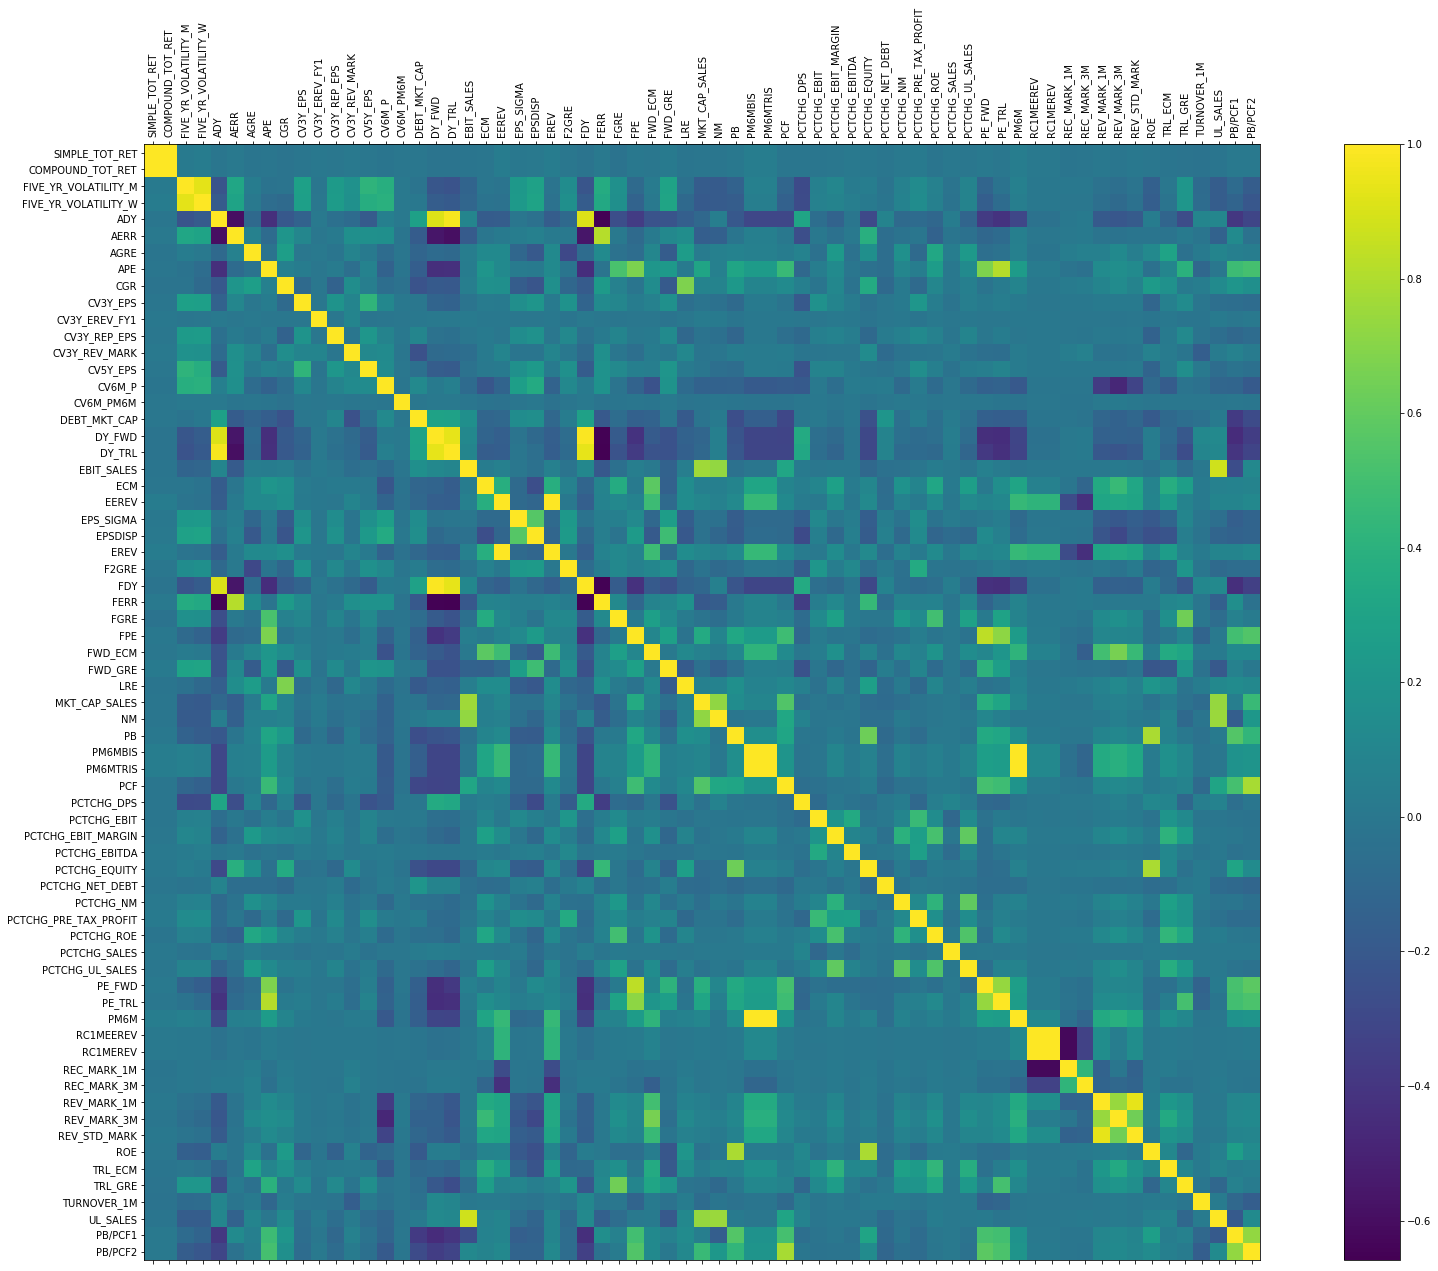

In [5]:
#TOTAL MATRIX CORRELATION

df_tot = df.drop(['REF_DATE','SEDOLCHK','ICB_INDUSTRY_NUM', 'ICB_SECTOR_NUM'], axis = 1)
rho_tot = df_tot.corr()

f = plt.figure(figsize=(30, 20))
plt.matshow(rho_tot, fignum=f.number)
plt.xticks(range(df_tot.shape[1]), df_tot.columns, fontsize=10, rotation=90)
plt.yticks(range(df_tot.shape[1]), df_tot.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)

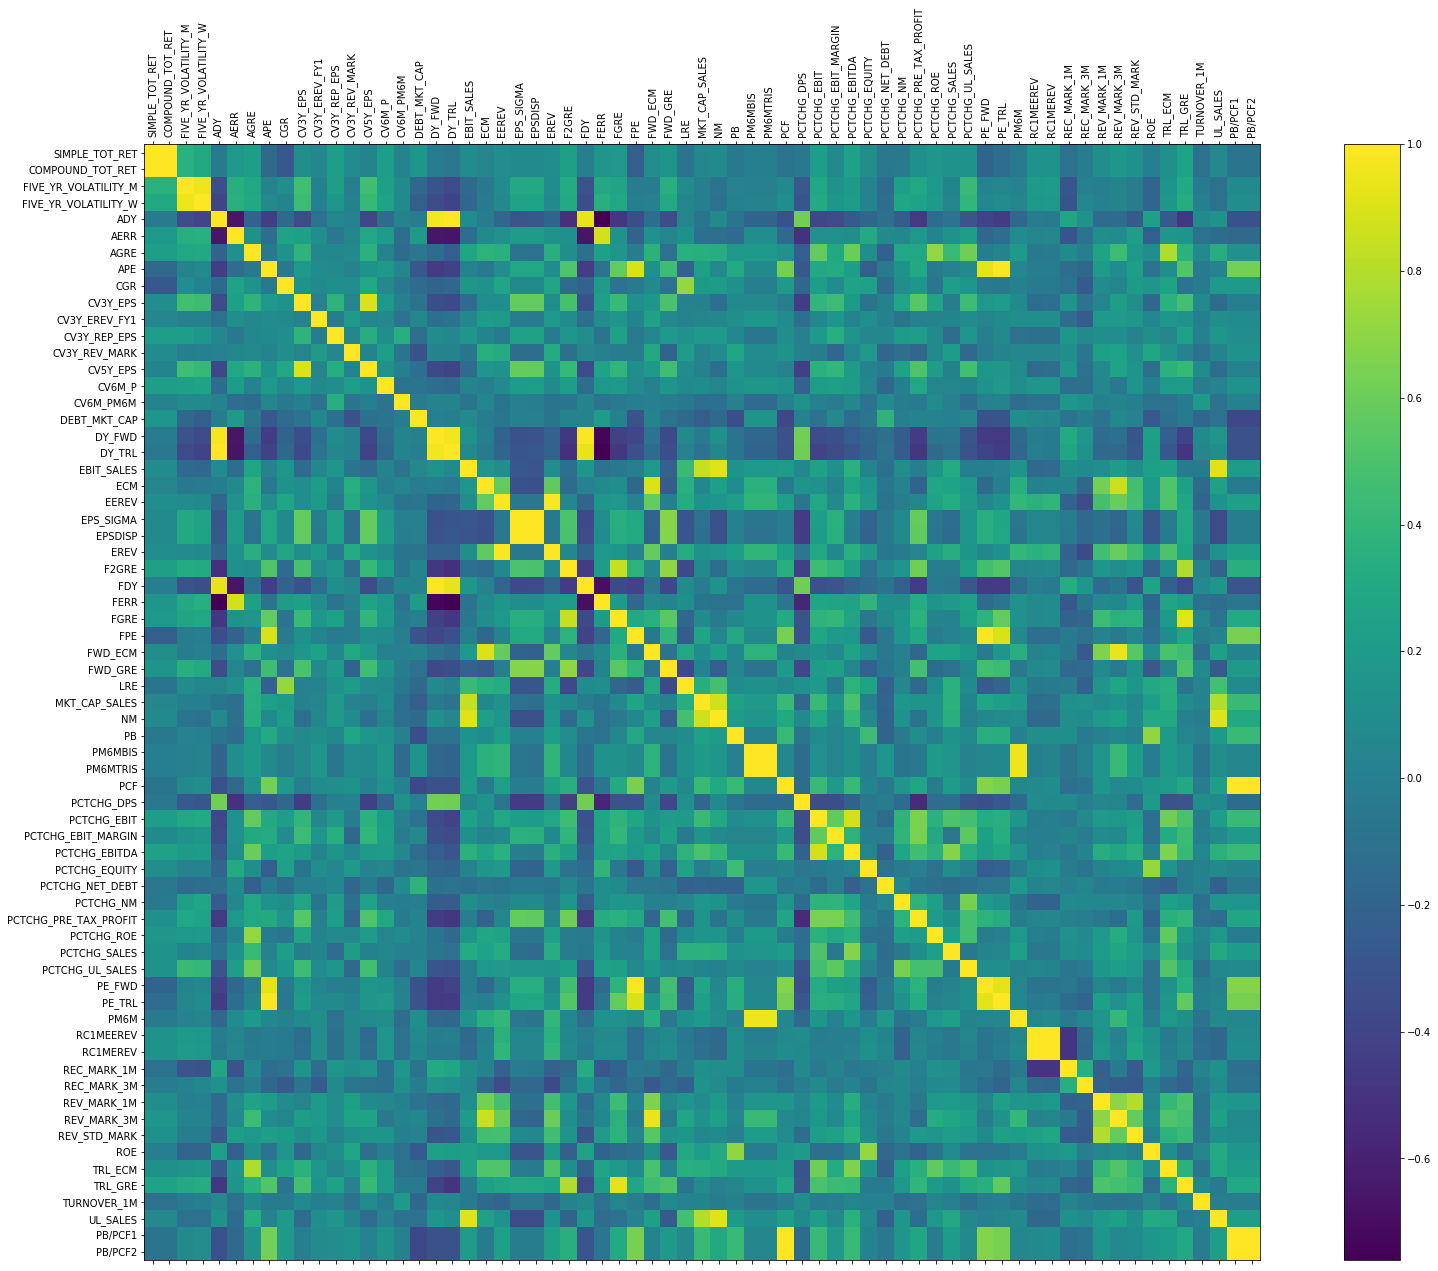

In [7]:
#GROUP MATRIX CORRELATION

df_group = df.groupby(['REF_DATE','ICB_INDUSTRY_NUM'])
dates = df.REF_DATE.unique()
industries = df.ICB_INDUSTRY_NUM.unique()
date = dates[6]
industry = industries[2]
df_group = df_group.get_group((date,industry))
df_group = df_group.drop(['REF_DATE','SEDOLCHK','ICB_INDUSTRY_NUM', 'ICB_SECTOR_NUM'], axis = 1)
rho_group = df_group.corr()

f = plt.figure(figsize=(30, 20))
plt.matshow(rho_group, fignum=f.number)
plt.xticks(range(df_group.shape[1]), df_group.columns, fontsize=10, rotation=90)
plt.yticks(range(df_group.shape[1]), df_group.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)

                      COMPOUND_TOT_RET  FIVE_YR_VOLATILITY_M
COMPOUND_TOT_RET              1.000000              0.027281
FIVE_YR_VOLATILITY_M          0.027281              1.000000
                      COMPOUND_TOT_RET  FIVE_YR_VOLATILITY_M
COMPOUND_TOT_RET              1.000000              0.366882
FIVE_YR_VOLATILITY_M          0.366882              1.000000
                  COMPOUND_TOT_RET       CGR
COMPOUND_TOT_RET          1.000000 -0.021316
CGR                      -0.021316  1.000000
                  COMPOUND_TOT_RET      CGR
COMPOUND_TOT_RET           1.00000 -0.27793
CGR                       -0.27793  1.00000
                  COMPOUND_TOT_RET   TRL_GRE
COMPOUND_TOT_RET          1.000000 -0.022092
TRL_GRE                  -0.022092  1.000000
                  COMPOUND_TOT_RET  TRL_GRE
COMPOUND_TOT_RET           1.00000  0.25974
TRL_GRE                    0.25974  1.00000


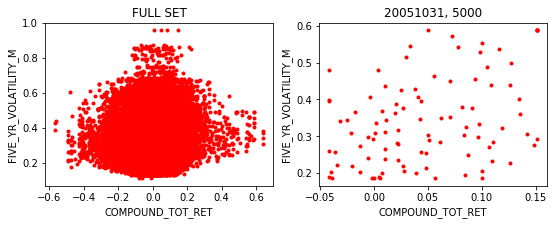

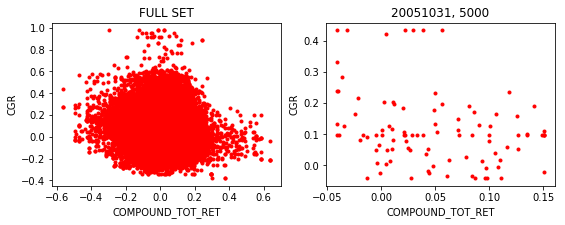

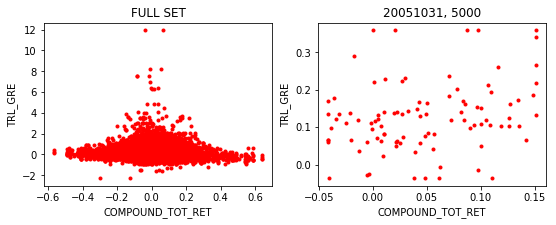

In [14]:
# FIGURE 1

factor1 = 'COMPOUND_TOT_RET'
factor2 = 'FIVE_YR_VOLATILITY_M'

fig1 = plt.figure(figsize=(9,3))

ax1 = fig1.add_subplot(121)
ax1.set_xlabel(factor1)
ax1.set_ylabel(factor2)
ax1.set_title("FULL SET")
plt.plot(df_tot[factor1], df_tot[factor2], 'r.')
print(df_tot[[factor1, factor2]].corr())

ax2 = fig1.add_subplot(122)
ax2.set_xlabel(factor1)
ax2.set_ylabel(factor2)
ax2.set_title(str(date) + ", " + str(industry))
plt.plot(df_group[factor1], df_group[factor2], 'r.')
print(df_group[[factor1, factor2]].corr())

# FIGURE 2

factor1 = 'COMPOUND_TOT_RET'
factor2 = 'CGR'

fig2 = plt.figure(figsize=(9,3))

ax1 = fig2.add_subplot(121)
ax1.set_xlabel(factor1)
ax1.set_ylabel(factor2)
ax1.set_title("FULL SET")
plt.plot(df_tot[factor1], df_tot[factor2], 'r.')
print(df_tot[[factor1, factor2]].corr())

ax2 = fig2.add_subplot(122)
ax2.set_xlabel(factor1)
ax2.set_ylabel(factor2)
ax2.set_title(str(date) + ", " + str(industry))
plt.plot(df_group[factor1], df_group[factor2], 'r.')
print(df_group[[factor1, factor2]].corr())

# FIGURE 3

factor1 = 'COMPOUND_TOT_RET'
factor2 = 'TRL_GRE'

fig3 = plt.figure(figsize=(9,3))

ax1 = fig3.add_subplot(121)
ax1.set_xlabel(factor1)
ax1.set_ylabel(factor2)
ax1.set_title("FULL SET")
plt.plot(df_tot[factor1], df_tot[factor2], 'r.')
print(df_tot[[factor1, factor2]].corr())

ax2 = fig3.add_subplot(122)
ax2.set_xlabel(factor1)
ax2.set_ylabel(factor2)
ax2.set_title(str(date) + ", " + str(industry))
plt.plot(df_group[factor1], df_group[factor2], 'r.')
print(df_group[[factor1, factor2]].corr())


## 3) Features integration


In this phase there are few trasformations of the features such as the binary encoder for the industries and the label classification (proposed in 3 alternatives)

#### Let's trasform the ICB_INDUSTRY_NUM (10 industry group identifiers) as dummy variables (10 vectors)

In [15]:
lb = preprocessing.LabelBinarizer()
name_list = []
for i in df['ICB_INDUSTRY_NUM'].unique():
    name = 'sector_' + str(i)
    name_list.append(name)
lb.fit(df['ICB_INDUSTRY_NUM'].unique())
sector_df = pd.DataFrame(lb.transform(df['ICB_INDUSTRY_NUM']), columns = name_list)
df = df.join(sector_df, how='outer')
df.head()

REF_DATE SEDOLCHK  SIMPLE_TOT_RET  COMPOUND_TOT_RET  FIVE_YR_VOLATILITY_M  \
0  20050429  0028262        0.014546          0.015183              0.374144   
1  20050429  0038614        0.043240          0.043240              0.243429   
2  20050429  0044473        0.043979          0.043979              0.457628   
3  20050429  0045614        0.062633          0.064127              0.330014   
4  20050429  0047245        0.063380          0.063380              0.380265   

   FIVE_YR_VOLATILITY_W       ADY      AERR      AGRE        APE  ...  \
0              0.410857  0.034056  0.583228  0.038748  12.237950  ...   
1              0.240235  0.056665  0.424596  0.069312   9.780680  ...   
2              0.457729  0.033439  0.485167  0.058342  15.396250  ...   
3              0.296963  0.038021  0.720774  1.868184   7.344045  ...   
4              0.394760  0.049925  0.411554  0.040607  11.786590  ...   

   sector_1  sector_8000  sector_5000  sector_1000  sector_2000  sector_9000  \
0         1            0            0            0            0            0   
1         0            0            0            0            0            0   
2         0            0            0            0            0            1   
3         0            1            0            0            0            0   
4         0            0            0            0            0            1   

   sector_3000  sector_7000  sector_4000  sector_6000  
0            0            0            0            0  
1            0            0            1            0  
2            0            0            0            0  
3            0            0            0            0  
4            0            0            0            0  

[5 rows x 81 columns]

#### Define YEAR and MONTH variables (for rolling window definition) and frop useless columns

In [89]:
df['YEAR'] = df['REF_DATE'].astype(str).str[0:4].astype(int)
df['MONTH'] = df['REF_DATE'].astype(str).str[4:6].astype(int)
df_final=df.drop(['REF_DATE','SEDOLCHK','SIMPLE_TOT_RET','COMPOUND_TOT_RET','YEAR','MONTH','ICB_INDUSTRY_NUM', 'ICB_SECTOR_NUM'], axis = 1)

In [17]:
df.to_pickle('Final.pickle')

### Alternative 1

#### Let's define out target label (y) as a binary classification problem

Labels: 
- 0 : (return of company i at time t) < 0
- 1 : (return of company i at time t) > 0

In [90]:
df_alt1 = df_final.copy()
df_alt1['class_return'] = df['COMPOUND_TOT_RET']
df_alt1['class_return'] = df_alt1['class_return'].where(df['COMPOUND_TOT_RET'] < 0, 0)
df_alt1['class_return'] = df_alt1['class_return'].where(df['COMPOUND_TOT_RET'] >= 0, 1)
df_alt1['class_return'] = df_alt1['class_return'].astype('int')

In [91]:
df_alt1.to_pickle('Alternative_1.pickle')

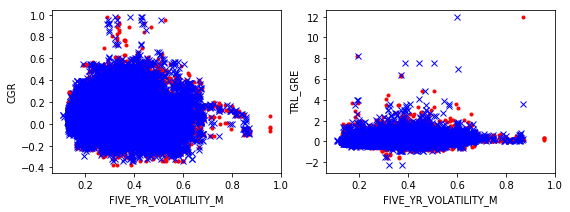

In [32]:
# FIGURE 1

factor1 = 'FIVE_YR_VOLATILITY_M'
factor2 = 'CGR'

fig1 = plt.figure(figsize=(9,3))

ax1 = fig1.add_subplot(121)
ax1.set_xlabel(factor1)
ax1.set_ylabel(factor2)
plt.plot(df[df_alt1['class_return'] == 1][factor1], df[df_alt1['class_return'] == 1][factor2], 'r.')
plt.plot(df[df_alt1['class_return'] == 0][factor1], df[df_alt1['class_return'] == 0][factor2], 'bx')

factor2 = 'TRL_GRE'

ax2 = fig1.add_subplot(122)
ax2.set_xlabel(factor1)
ax2.set_ylabel(factor2)
plt.plot(df[df_alt1['class_return'] == 1][factor1], df[df_alt1['class_return'] == 1][factor2], 'r.')
plt.plot(df[df_alt1['class_return'] == 0][factor1], df[df_alt1['class_return'] == 0][factor2], 'bx')

### Alternative 2

#### Let's define out target label (y) as a multiclassification problem

Labels: 
- 0 : worst quantile within the sector at each t
- 1 : second quantile within the sector at each t
- 2 : third quantile within the sector at each t
- 3 : fourth quantile within the sector at each t
- 4 : best quantile within the sector at each t

In [33]:
df_alt2 = df_final.copy()
df_quant = df.copy()
quantile_list = [0.2, 0.4, 0.6, 0.8]

for i in quantile_list:
    df_quant['quantile_' + str(i)]=df.groupby(['REF_DATE','ICB_INDUSTRY_NUM'])['COMPOUND_TOT_RET'].transform(lambda x: np.quantile(x, i))
    
    
#df_alt2['class_return'] = df['COMPOUND_TOT_RET']
conditions = [
    (df_quant['COMPOUND_TOT_RET'] <= df_quant['quantile_0.2']),
    ((df_quant['COMPOUND_TOT_RET'] > df_quant['quantile_0.2']) & (df_quant['COMPOUND_TOT_RET'] <= df_quant['quantile_0.4'])),
    ((df_quant['COMPOUND_TOT_RET'] > df_quant['quantile_0.4']) & (df_quant['COMPOUND_TOT_RET'] <= df_quant['quantile_0.6'])),
    ((df_quant['COMPOUND_TOT_RET'] > df_quant['quantile_0.6']) & (df_quant['COMPOUND_TOT_RET'] <= df_quant['quantile_0.8'])),
     (df_quant['COMPOUND_TOT_RET'] > df_quant['quantile_0.8'])
     ]

choices = [0,1,2,3,4]

df_alt2['class_return'] = np.select(conditions, choices, default='problem')


df_alt2.head()

FIVE_YR_VOLATILITY_M  FIVE_YR_VOLATILITY_W       ADY      AERR      AGRE  \
0              0.374144              0.410857  0.034056  0.583228  0.038748   
1              0.243429              0.240235  0.056665  0.424596  0.069312   
2              0.457628              0.457729  0.033439  0.485167  0.058342   
3              0.330014              0.296963  0.038021  0.720774  1.868184   
4              0.380265              0.394760  0.049925  0.411554  0.040607   

         APE       CGR  CV3Y_EPS  CV3Y_EREV_FY1  CV3Y_REP_EPS  ...  \
0  12.237950  0.013896  0.083481       1.607419      0.553340  ...   
1   9.780680  0.095448  0.109293       3.127584      0.159140  ...   
2  15.396250 -0.039659  0.096995       4.946424      6.783878  ...   
3   7.344045  0.287677  0.588851       1.500366      0.688070  ...   
4  11.786590  0.101532  0.061296      17.671170      0.162248  ...   

   sector_8000  sector_5000  sector_1000  sector_2000  sector_9000  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            1   
3            1            0            0            0            0   
4            0            0            0            0            1   

   sector_3000  sector_7000  sector_4000  sector_6000  class_return  
0            0            0            0            0             0  
1            0            0            1            0             2  
2            0            0            0            0             2  
3            0            0            0            0             3  
4            0            0            0            0             3  

[5 rows x 76 columns]

#### Check if it's all ok

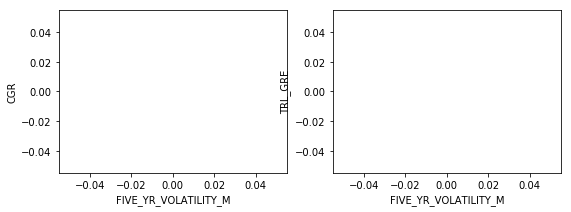

In [36]:
# FIGURE 1

factor1 = 'FIVE_YR_VOLATILITY_M'
factor2 = 'CGR'

fig1 = plt.figure(figsize=(9,3))

ax1 = fig1.add_subplot(121)
ax1.set_xlabel(factor1)
ax1.set_ylabel(factor2)
plt.plot(df[df_alt2['class_return'] == 0][factor1], df[df_alt2['class_return'] == 1][factor2], 'r.')
plt.plot(df[df_alt2['class_return'] == 1][factor1], df[df_alt2['class_return'] == 0][factor2], 'bx')
#plt.plot(df[df_alt2['class_return'] == 2][factor1], df[df_alt2['class_return'] == 0][factor2], 'gx')
#plt.plot(df[df_alt2['class_return'] == 3][factor1], df[df_alt2['class_return'] == 0][factor2], 'y.')
#plt.plot(df[df_alt2['class_return'] == 4][factor1], df[df_alt2['class_return'] == 0][factor2], 'k.')

factor2 = 'TRL_GRE'

ax2 = fig1.add_subplot(122)
ax2.set_xlabel(factor1)
ax2.set_ylabel(factor2)
plt.plot(df[df_alt2['class_return'] == 0][factor1], df[df_alt2['class_return'] == 1][factor2], 'r.')
plt.plot(df[df_alt2['class_return'] == 1][factor1], df[df_alt2['class_return'] == 0][factor2], 'bx')
#plt.plot(df[df_alt2['class_return'] == 2][factor1], df[df_alt2['class_return'] == 0][factor2], 'gx')
#plt.plot(df[df_alt2['class_return'] == 3][factor1], df[df_alt2['class_return'] == 0][factor2], 'y.')
#plt.plot(df[df_alt2['class_return'] == 4][factor1], df[df_alt2['class_return'] == 0][factor2], 'k.')

In [52]:
sum(df_alt2['class_return'] == 'problem')

0

In [69]:
df_alt2.to_pickle('Alternative_2.pickle')

### Alternative 3

#### Let's define out target label (y) as a multiclassification problem and our features (X) as 5 quintiles class

Labels: 
- 0 : worst quantile within the sector at each t
- 1 : second quantile within the sector at each t
- 2 : third quantile within the sector at each t
- 3 : fourth quantile within the sector at each t
- 4 : best quantile within the sector at each t

All X(i) in X: 
- 0 : worst quantile within the sector at each t
- 1 : second quantile within the sector at each t
- 2 : third quantile within the sector at each t
- 3 : fourth quantile within the sector at each t
- 4 : best quantile within the sector at each t



In [54]:
quantile_list = [0.2, 0.4, 0.6, 0.8]
df_quant = pd.DataFrame()
df_alt3 = pd.DataFrame()

for f in df.columns[2:-12]:
    for i in quantile_list:
        df_quant[f + '_' + str(i)] = df.groupby(['REF_DATE','ICB_INDUSTRY_NUM'])[f].transform(lambda x: np.quantile(x, i))


for f in df.columns[2:-12]:
    conditions = [
        (df[f] <= df_quant[f + '_0.2']),
        ((df[f] > df_quant[f + '_0.2']) & (df[f] <= df_quant[f + '_0.4'])),
        ((df[f] > df_quant[f + '_0.4']) & (df[f] <= df_quant[f + '_0.6'])),
        ((df[f] > df_quant[f + '_0.6']) & (df[f] <= df_quant[f + '_0.8'])),
         (df[f] > df_quant[f + '_0.8'])
         ]

    choices = [0,1,2,3,4]

    df_alt3[f] = np.select(conditions, choices, default='problem')

df_alt3['class_return'] = df_alt3['COMPOUND_TOT_RET']
df_alt3=df_alt3.drop(['SIMPLE_TOT_RET','COMPOUND_TOT_RET'], axis = 1)

for i in df['ICB_INDUSTRY_NUM'].unique():
    name = 'sector_' + str(i)
    df_alt3[name] = df[name]

df_alt3.head()

SIMPLE_TOT_RET COMPOUND_TOT_RET FIVE_YR_VOLATILITY_M FIVE_YR_VOLATILITY_W  \
0              0                0                    3                    4   
1              2                2                    1                    1   
2              2                2                    4                    4   
3              3                3                    3                    2   
4              3                3                    3                    3   

  ADY AERR AGRE APE CGR CV3Y_EPS  ... sector_1 sector_8000 sector_5000  \
0   3    1    0   2   0        0  ...        1           0           0   
1   4    1    1   0   3        1  ...        0           0           0   
2   3    1    1   2   0        1  ...        0           0           0   
3   3    3    4   0   4        4  ...        0           1           0   
4   4    0    1   0   2        0  ...        0           0           0   

  sector_1000 sector_2000 sector_9000 sector_3000 sector_7000 sector_4000  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           1   
2           0           0           1           0           0           0   
3           0           0           0           0           0           0   
4           0           0           1           0           0           0   

  sector_6000  
0           0  
1           0  
2           0  
3           0  
4           0  

[5 rows x 80 columns]

In [56]:
df_alt3.to_pickle('Alternative_3.pickle')

## 4) Modelling and Evaluation

The following function train and test the algos on the dataset based on the rolling window indexing depending on the State variable "year" which decides the lenght of the training period

#### Function to plot the Confusion matrix

In [2]:
#Function for the confusion matrix graph

def plot_confusion_matrix(y_true, y_pred, classes,
                          cm = None,
                          normalize = True,
                          title = None,
                          cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    if cm is None:
        cm = confusion_matrix(y_true, y_pred)
        
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' #if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [164]:
def time_model(model, years, df, df_alt, init_cap, threshold):
    
    time_breakdown = [] 
    for i in df['YEAR'].unique():
        for x in sorted(df['MONTH'].unique()):
            step = df_alt[df['YEAR'] == i][df['MONTH'] == x]
            if len(step) > 0:
                time_breakdown.append(step.index.values)
    
    test_list = []
    for i in range(0,len(time_breakdown)):
        test = time_breakdown[i][0], time_breakdown[i][-1]
        test_list.append(test)
    
    train_list = []
    learning_period = years * 12 - 1

    for i in range(0, len(test_list)):
        if i + (years * 12 - 1) < len(test_list):
            train = [test_list[i][0],test_list[i + learning_period][1]]
            train_list.append(train)
    
    date_list = []
    quarter_rate_list = []
    
    accurancy_train_list = []
    precision_train_list = []
    
    accurancy_test_list = []
    precision_test_list = []
    
    y_train_list = []
    y_train_predict_list = []

    y_test_list = []
    y_test_predict_list = []
    
    positive_predictions_list = []
    
    capital = []
    capital_benchmark = []
    
    bench_cap = init_cap
    
    for i in range(0,len(train_list)):
        
        #Creating the train and test sets for all the steps (in function of the i-step)
        
        if i + learning_period + 1 < len(test_list):
                        
            #TRAINING SET
            
            X_plain_train = np.c_[df_alt[train_list[i][0]:(train_list[i][1] + 1)].drop(['class_return'], axis = 1)]
            y_plain_train = np.c_[df_alt[train_list[i][0]:(train_list[i][1] + 1)]['class_return']]
            
            min_max_scaler = preprocessing.MinMaxScaler()
            X_scaled_train = min_max_scaler.fit_transform(X_plain_train)
            y_scaled_train = min_max_scaler.fit_transform(y_plain_train)

            X_train = X_scaled_train
            y_train = y_plain_train
            
            #TESTING SET

            X_plain_test = np.c_[df_alt[test_list[i + learning_period + 1][0]:(test_list[i + learning_period + 1][1] + 1)].drop(['class_return'], axis = 1)]
            y_plain_test = np.c_[df_alt[test_list[i + learning_period + 1][0]:(test_list[i + learning_period + 1][1] + 1)]['class_return']]
            
            min_max_scaler = preprocessing.MinMaxScaler()
            X_scaled_test = min_max_scaler.fit_transform(X_plain_test)
            y_scaled_test = min_max_scaler.fit_transform(y_plain_test)

            X_test = X_scaled_test
            y_test = y_plain_test
            
            #MODEL

            clf = model
            clf.fit(X_train, y_train)
            #print('train: ',i)
            #print('feature_importances: ',clf.feature_importances_)

            y_train_predict = clf.predict(X_train)
            y_train_list.append(y_train)
            y_train_predict_list.append(y_train_predict)
            
            y_test_predict = clf.predict(X_test)
            y_test_list.append(y_test)
            y_test_predict_list.append(y_test_predict)  # List of all the predictions
            
            y_origin_test = np.c_[df[test_list[i + learning_period + 1][0]:(test_list[i + learning_period + 1][1] + 1)]['COMPOUND_TOT_RET']]
            
            y_test_predict_num = y_test_predict.astype(int)
            weights = y_test_predict_num/y_test_predict_num.sum()
            
            #print('initial capital: ' + str(init_cap))
            weights_reshaped = (weights.reshape((1 + y_origin_test).shape))
            returns = (1 + y_origin_test)
            #init_cap = init_cap * np.inner(weights_reshaped, returns)
            init_cap = init_cap * np.sum(weights_reshaped * returns)
            #print('final capital: ' + str(init_cap))
            capital.append(init_cap)
            
            weights = 1/len(y_test_predict)
            bench_cap = bench_cap * np.sum(weights *  (1 + y_origin_test))
            capital_benchmark.append(bench_cap)
            
            accurancy_train_list.append(accuracy_score(y_train,y_train_predict, normalize=True))
            precision_train_list.append(precision_score(y_train,y_train_predict, average='weighted'))
            
            accurancy_test_list.append(accuracy_score(y_test,y_test_predict, normalize=True))
            precision_test_list.append(precision_score(y_test,y_test_predict, average='weighted'))
            
            #print('train', accuracy_score(y_train,y_train_predict, normalize=True))
            #print('test', accuracy_score(y_test,y_test_predict, normalize=True))
            
            #positive_predictions_list.append(sum(y_test_predict)/len(y_test_predict))
            
            #quarter_rate = df[test_list[i + learning_period + 1][0]:test_list[i + learning_period + 1][1]]['class_return'].sum()/len(df[test_list[i + learning_period + 1][0]:test_list[i + learning_period + 1][1]]['class_return'])
            #quarter_rate_list.append(quarter_rate)
            

    y_train_total = np.concatenate((y_train_list))
    y_train_predict_total = np.concatenate((y_train_predict_list))
    
    y_test_total = np.concatenate((y_test_list))
    y_test_predict_total = np.concatenate((y_test_predict_list))
    
    
    y1 = accurancy_train_list
    y2 = precision_train_list
    y3 = np.ones(len(precision_train_list)) * threshold
    
    y4 = accurancy_test_list
    y5 = precision_test_list
    y6 = np.ones(len(precision_test_list)) * threshold
    
    
    #y7 = quarter_rate_list
    #y8 = positive_predictions_list
    
    year_train = df['YEAR'].unique()
    year_test = df['YEAR'].unique()
    for i in range(0,years):
        year_test = np.delete(year_test,[0])
        
    x1 = np.arange(0,len(y1))
    x2 = np.arange(0,len(y4))

    ax = []
    plt.figure(0, figsize=(20, 50))

    ax.append(plt.subplot2grid((5,1), (0,0)))
    ax.append(plt.subplot2grid((5,1), (1,0)))
    #ax.append(plt.subplot2grid((5,1), (2,0)))


    ax[0].plot(x1, y1, label = 'accurancy',color = 'b')
    ax[0].plot(x1, y2, label = 'precision',color = 'g')
    ax[0].plot(x1, y3, label = 'threshold',color = 'r')


    ax[0].set_title('TRAIN METRICS', fontsize = 25)
    ax[0].legend(loc='best',fontsize = 15)
    ax[0].set_ylabel('%',fontsize = 15)
    ax[0].set_xticks(np.arange(0,len(x1),len(x1)/len(year_train)))
    ax[0].set_xticklabels(year_train, fontsize=15)
    ax[0].set_xlabel('DATE',fontsize = 15)
    ax[0].set_ylim([0, 1])
    
    ax[1].plot(x2, y4, label = 'accurancy',color = 'b')
    ax[1].plot(x2, y5, label = 'precision',color = 'g')
    ax[1].plot(x2, y6, label = 'threshold',color = 'r')


    ax[1].set_title('TEST METRICS', fontsize = 25)
    ax[1].legend(loc='best',fontsize = 15)
    ax[1].set_ylabel('%',fontsize = 15)
    ax[1].set_xticks(np.arange(0,len(x2),len(x2)/len(year_test)))
    ax[1].set_xticklabels(year_test, fontsize=15)
    ax[1].set_ylim([0, 1])

    
    #ax[2].plot(x2, y7, label = 'monthly positive returns real percentage',color = 'r')
    #ax[2].plot(x2, y8, label = 'monthly positive returns predicted percentage',color = 'g')

    #ax[2].set_title('Positive returns rate', fontsize=20)
    #ax[2].legend(loc='best',fontsize = 15)
    #ax[2].set_ylabel('%',fontsize = 15)
    #ax[2].set_xticks(np.arange(0,len(x2),len(x2)/len(year_test)))
    #ax[2].set_xticklabels(year_test, fontsize = 15)
    
    print('mean accurancy:',)
    print(np.mean(accurancy_train_list))
    
    print('mean precision:')
    print(np.mean(precision_train_list))
    
    print('mean accurancy:',)
    print(np.mean(accurancy_test_list))
    
    print('mean precision:')
    print(np.mean(precision_test_list))
    
    plot_confusion_matrix(y_train_total, y_train_predict_total, title = 'Confusion Matrix - Train set', classes = [0,1,2,3,4])
    plot_confusion_matrix(y_test_total, y_test_predict_total, title = 'Confusion Matrix - Test set',classes = [0,1,2,3,4])

    plt.figure(3, figsize=(15, 10))
    plt.plot(capital, label = 'strategy', color = 'blue', marker='')
    plt.plot(capital_benchmark, label = 'benchmark', color = 'red', marker='')
    plt.title('Capital gain', fontsize = 15)
    plt.legend(loc='best',fontsize = 15)
    plt.ylabel('Capital $',fontsize = 10)
    plt.xticks(np.arange(0,len(capital),len(capital)/len(year_test)), year_test)
    plt.xlabel('Time',fontsize = 10)
    
    #return capital, capital_benchmark, year_test
 

### Testing Alternative 1

##### a) Logistic Regression

train 0.7020504951876133
test 0.2337228714524207
train 0.647190071119788
test 0.48327759197324416
train 0.6311166875784191
test 0.41638795986622074
train 0.6164459930313588
test 0.2332214765100671
train 0.642827268925136
test 0.6560402684563759
train 0.6409147957049226
test 0.40604026845637586
train 0.6867066536476496
test 0.47906197654941374
train 0.6688058035714286
test 0.44537815126050423
train 0.6736430863680759
test 0.48322147651006714
train 0.6665736217725052
test 0.5209380234505863
train 0.6398659966499163
test 0.661641541038526
train 0.6472148541114059
test 0.6638655462184874
train 0.6568435754189944
test 0.6197654941373534
train 0.6899972059234423
test 0.30201342281879195
train 0.6703465623253214
test 0.292436974789916
train 0.6433664196840486
test 0.38190954773869346
train 0.6142018451216102
test 0.47906197654941374
train 0.6011180992313068
test 0.6890756302521008
train 0.5960301928990774
test 0.2332214765100671
train 0.5874458269257654
test 0.46901172529313234
train 0.579454

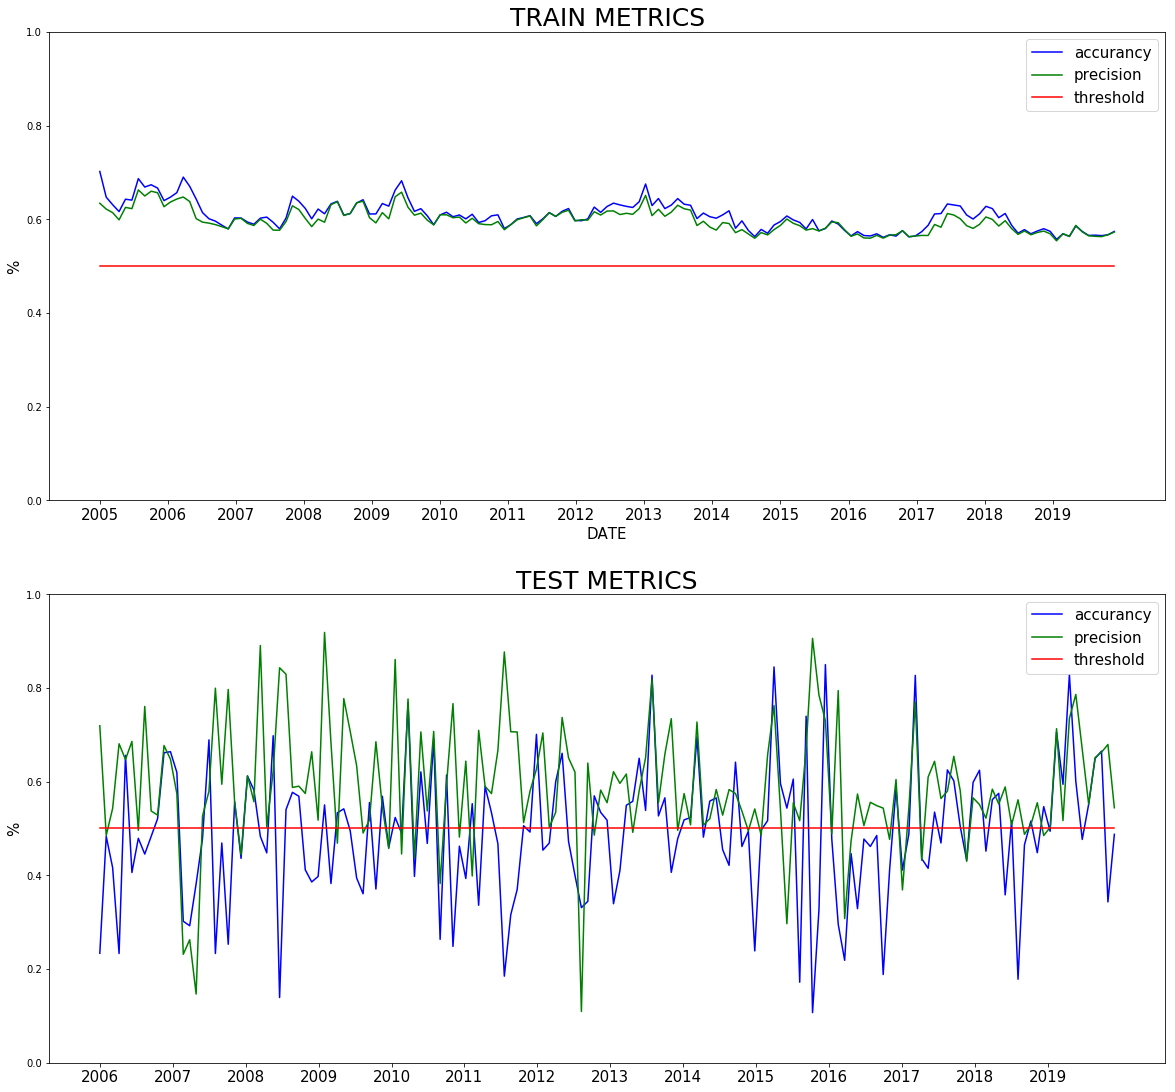

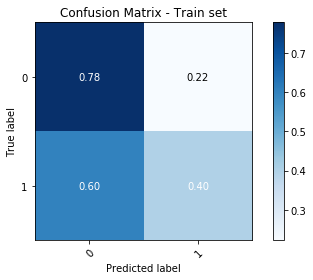

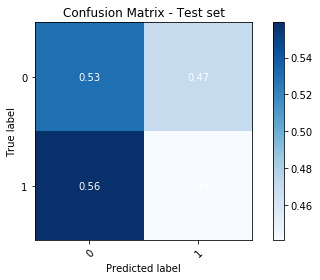

In [98]:
df=pd.read_pickle('Final.pickle')
df_alt=pd.read_pickle('Alternative_1.pickle')
c, b = time_model(LogisticRegression(), 8, df, df_alt, 100, 0.5)

##### b) Ridge Classifier

train 0.5696757843222932
test 0.4730639730639731
train 0.5683772635111515
test 0.6359060402684564
train 0.5625393274138293
test 0.11409395973154363
train 0.5636579738516395
test 0.6057046979865772
train 0.5627163083377033
test 0.23993288590604026
train 0.5631205425814572
test 0.36789297658862874
train 0.5685218850510418
test 0.5250836120401338
train 0.5652181513075094
test 0.5819397993311036
train 0.5636601992658626
test 0.459866220735786
train 0.5611081978675057
test 0.7658862876254181
train 0.5617374584862787
test 0.4682274247491639
train 0.5586435937773117
test 0.5518394648829431
train 0.5588358678552701
test 0.40468227424749165
train 0.5635651733118915
test 0.4531772575250836
train 0.5622367110070093
test 0.6003344481605352
train 0.5605411735915677
test 0.39028475711892796
train 0.5603740604789372
test 0.5986622073578596
train 0.5582570090190869
test 0.5325542570951586
train 0.5567421130822336
test 0.7028380634390651
train 0.5581557928587657
test 0.5
train 0.5569381335197483
test 0

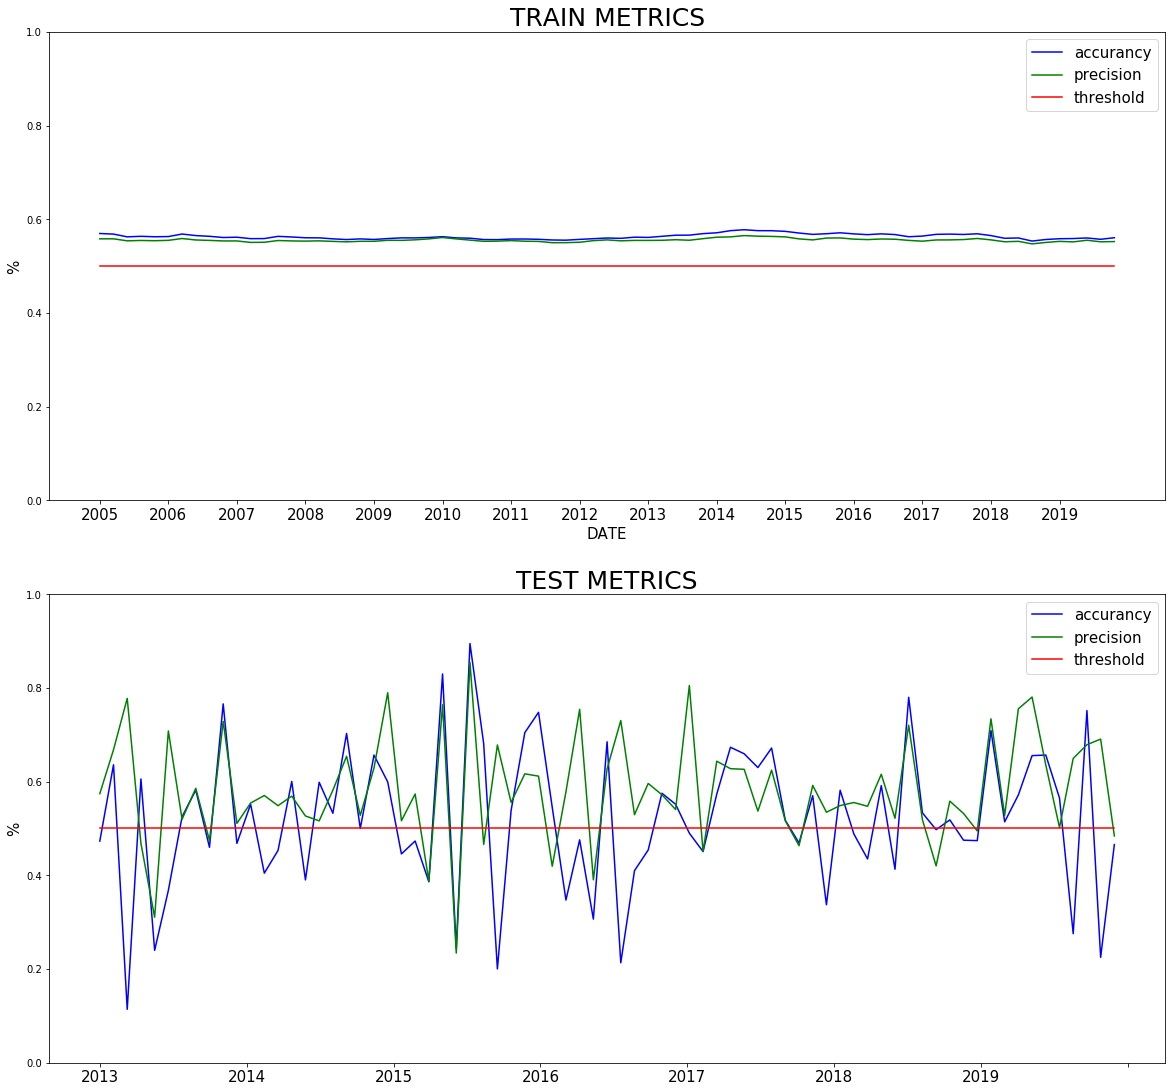

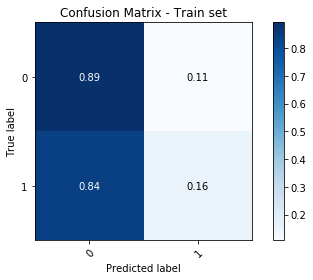

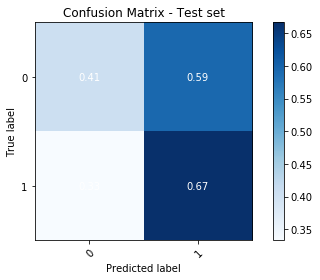

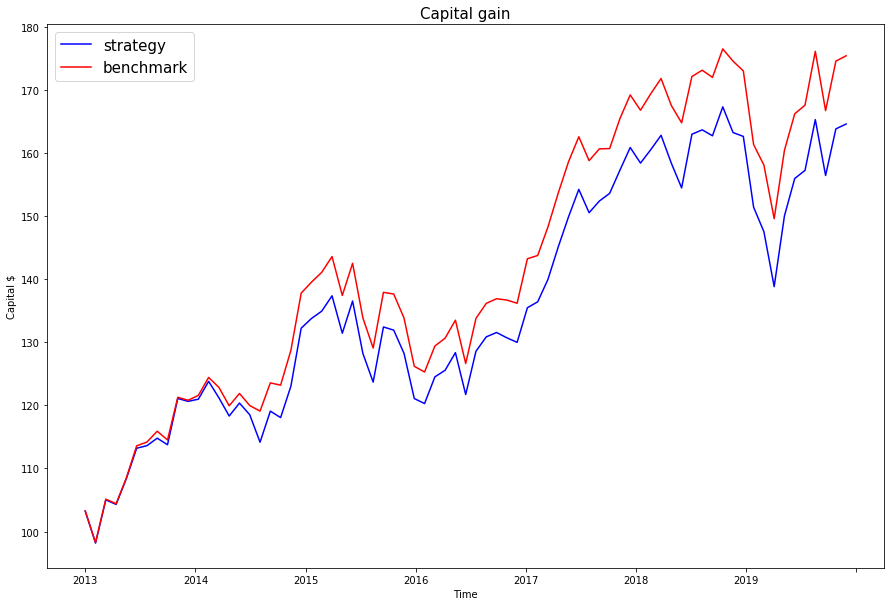

In [165]:
df=pd.read_pickle('Final.pickle')
df_alt=pd.read_pickle('Alternative_1.pickle')
c, b, t= time_model(RidgeClassifier(), 8, df, df_alt, 100, 0.5)

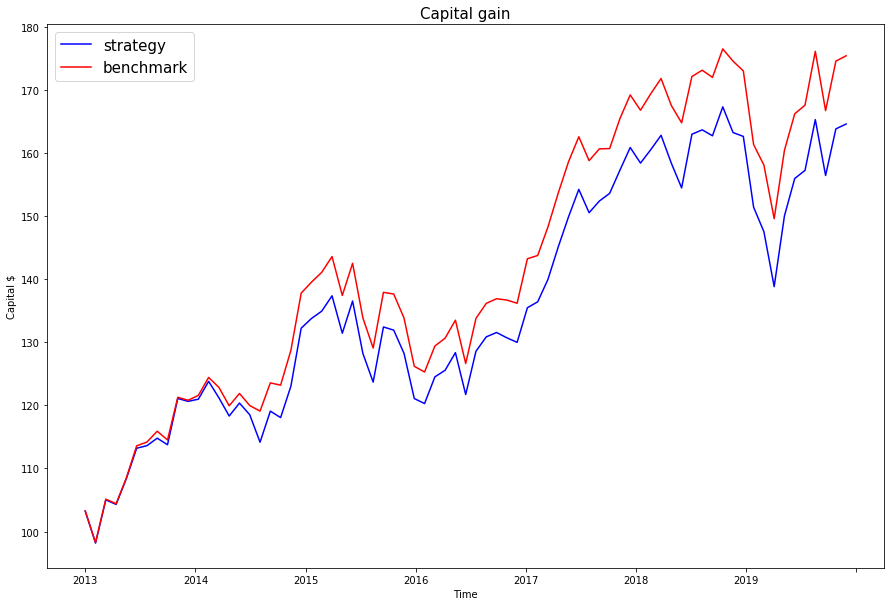

In [155]:
plt.figure(0, figsize=(15, 10))
plt.plot(c, label = 'strategy', color = 'blue', marker='')
plt.plot(b, label = 'benchmark', color = 'red', marker='')
plt.title('Capital gain', fontsize = 15)
plt.legend(loc='best',fontsize = 15)
plt.ylabel('Capital $',fontsize = 10)
plt.xticks(np.arange(0,len(c),len(c)/len(t)), t)
plt.xlabel('Time',fontsize = 10);

##### c) Random Forest

train 0.6024993445774709
test 0.6582491582491582
train 0.6012549814724184
test 0.2181208053691275
train 0.5977242536530798
test 0.3926174496644295
train 0.5993847444592043
test 0.5939597315436241
train 0.5970634504457263
test 0.5385906040268457
train 0.5956159977625507
test 0.7090301003344481
train 0.6000734163054118
test 0.5434782608695652
train 0.5972940847433925
test 0.6404682274247492
train 0.5968012585212376
test 0.45484949832775917
train 0.5941618598147177
test 0.7876254180602007
train 0.5958049292081804
test 0.45819397993311034
train 0.5914525432616675
test 0.5551839464882943
train 0.592606187729418
test 0.6538461538461539
train 0.5952909507245363
test 0.41471571906354515
train 0.5959901414113165
test 0.3712374581939799
train 0.5969340488384695
test 0.6415410385259631
train 0.5923789547281944
test 0.3862876254180602
train 0.594770327903237
test 0.5091819699499165
train 0.5958052958140347
test 0.7612687813021702
train 0.5955223098030306
test 0.4866220735785953
train 0.59496679482

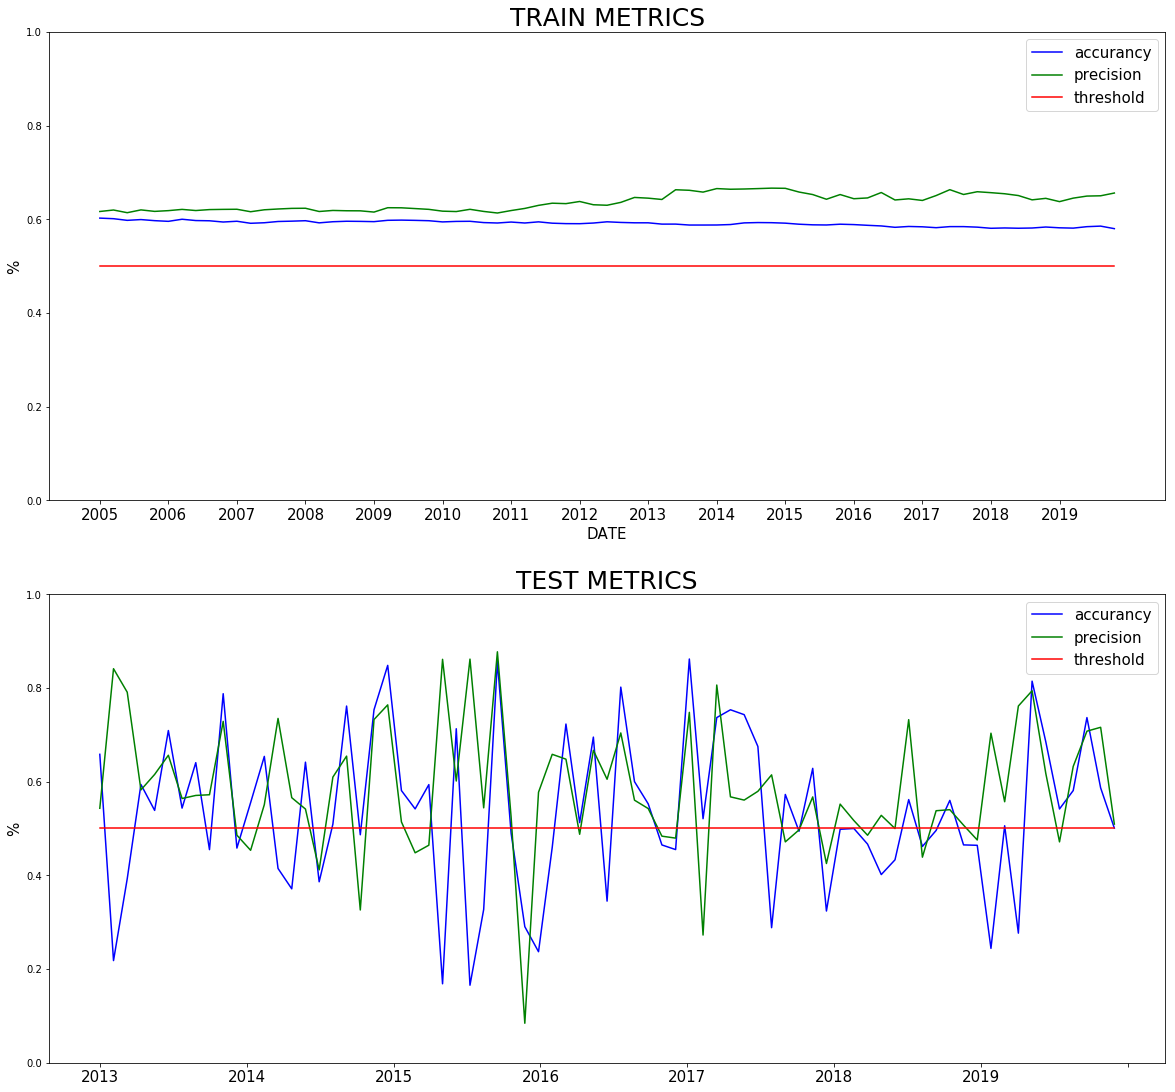

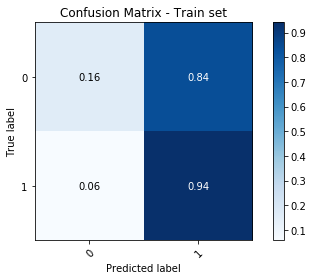

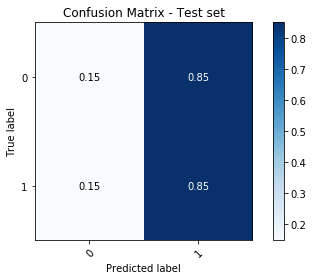

In [73]:
df=pd.read_pickle('Final.pickle')
df_alt=pd.read_pickle('Alternative_1.pickle')
time_model(RandomForestClassifier(n_estimators=50, max_leaf_nodes=50, n_jobs=-1, random_state=42),8, df, df_alt, 0.5)

##### d) Support Vector Machine

In [ ]:
df=pd.read_pickle('Final.pickle')
df_alt=pd.read_pickle('Alternative_1.pickle')
time_model(SVC(),8, df, df_alt, 0.5)

### Alternative 2

##### a) Logistic Regression

train 0.2473477234990824
test 0.22895622895622897
train 0.24715094735370202
test 0.22818791946308725
train 0.24760539746906243
test 0.19798657718120805
train 0.24769279172201636
test 0.21644295302013422
train 0.24754413564062228
test 0.23825503355704697
train 0.24764019018319117
test 0.22742474916387959
train 0.24837435323730947
test 0.21070234113712374
train 0.24776255069221087
test 0.2391304347826087
train 0.2479811221814368
test 0.23411371237458195
train 0.24803356056633455
test 0.2608695652173913
train 0.24845306764551653
test 0.21906354515050167
train 0.2492221639573501
test 0.20066889632107024
train 0.24862786226184233
test 0.21906354515050167
train 0.24877204635634254
test 0.22240802675585283
train 0.24896432379520705
test 0.20735785953177258
train 0.24898180356237654
test 0.21943048576214405
train 0.2484705471071491
test 0.20234113712374582
train 0.24814724183737677
test 0.21869782971619364
train 0.24843135541379008
test 0.22036727879799667
train 0.25017040390093853
test 0.2290

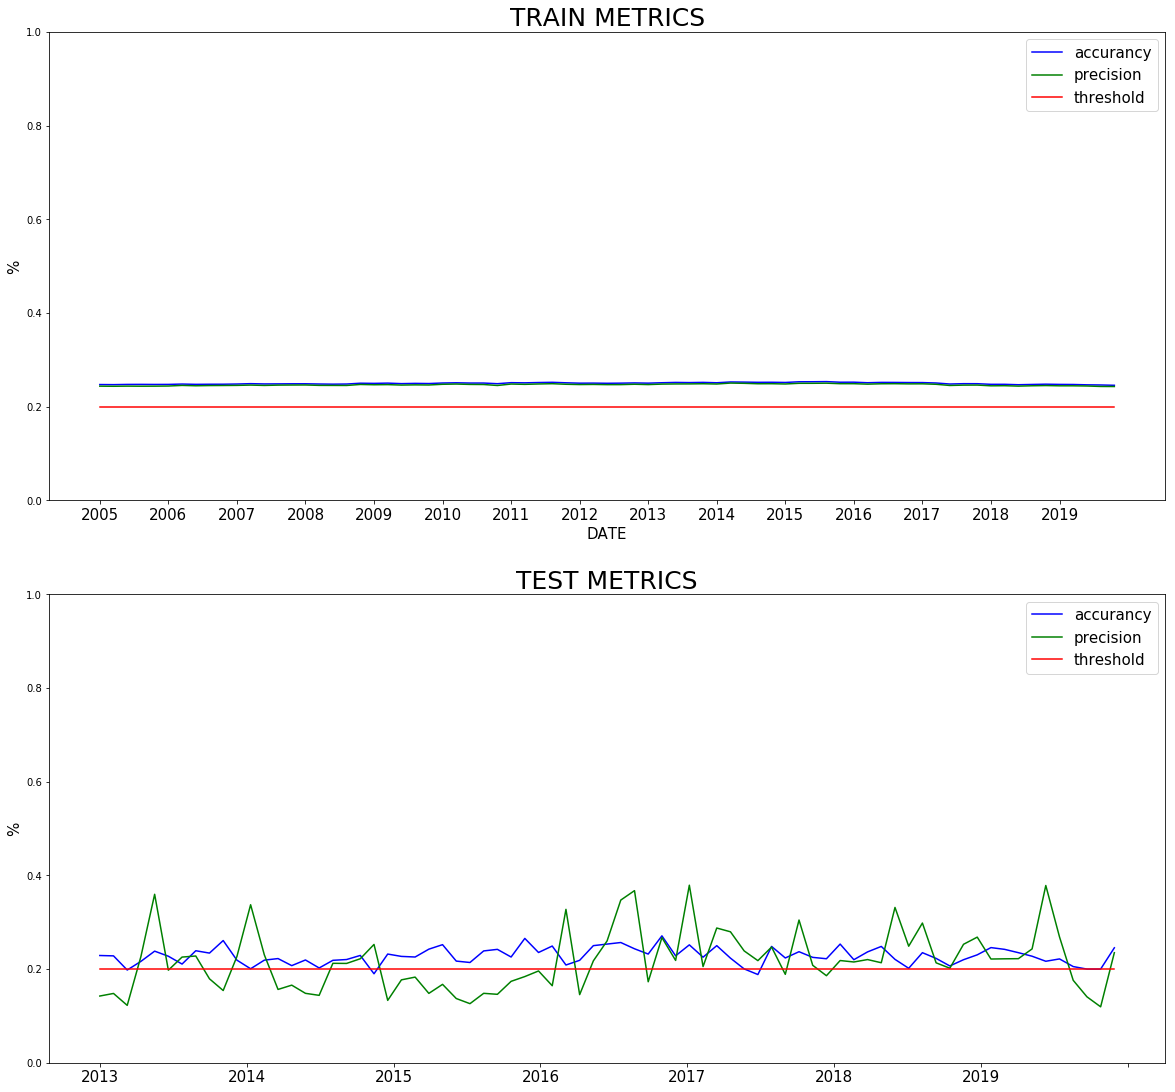

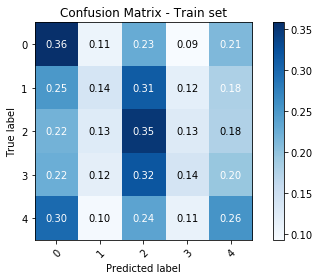

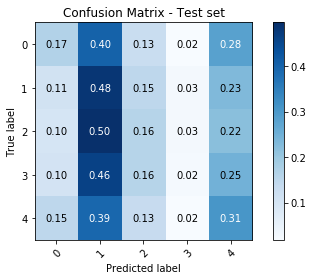

In [6]:
df=pd.read_pickle('Final.pickle')
df_alt=pd.read_pickle('Alternative_2.pickle')
time_model(LogisticRegression(),8, df, df_alt, 0.2)

##### b) Ridge Classifier

initial capital: 100
(594, 1)
(594, 1)
final capital: 103.80086078566507
train 0.24829153194092457
test 0.24242424242424243
initial capital: 103.80086078566507
(596, 1)
(596, 1)
final capital: 98.28954030337488
train 0.2472732993078375
test 0.2214765100671141
initial capital: 98.28954030337488
(596, 1)
(596, 1)
final capital: 104.83119652845338
train 0.2479899321820597
test 0.19798657718120805
initial capital: 104.83119652845338
(596, 1)
(596, 1)
final capital: 103.66147426652394
train 0.24875900160805425
test 0.21476510067114093
initial capital: 103.66147426652394
(596, 1)
(596, 1)
final capital: 107.37992709694825
train 0.24845306764551653
test 0.2197986577181208
initial capital: 107.37992709694825
(598, 1)
(598, 1)
final capital: 112.81697844785404
train 0.24772759054677668
test 0.21739130434782608
initial capital: 112.81697844785404
(598, 1)
(598, 1)
final capital: 113.42700202846318
train 0.2485666340371976
test 0.2140468227424749
initial capital: 113.42700202846318
(598, 1)
(598,

train 0.25055799679151847
test 0.225
initial capital: 176.37205122105084
(597, 1)
(597, 1)
final capital: 175.01509794524063
train 0.25074975589343007
test 0.21775544388609716
initial capital: 175.01509794524063
(600, 1)
(600, 1)
final capital: 179.5815813718381
train 0.24971666695726466
test 0.19666666666666666
initial capital: 179.5815813718381
(600, 1)
(600, 1)
final capital: 177.50675943831797
train 0.2503966385968583
test 0.18333333333333332
initial capital: 177.50675943831797
(599, 1)
(599, 1)
final capital: 175.47009093517565
train 0.24919370303864996
test 0.2270450751252087
initial capital: 175.47009093517565
(598, 1)
(598, 1)
final capital: 163.86102091913398
train 0.2486228296492574
test 0.2391304347826087
initial capital: 163.86102091913398
(599, 1)
(599, 1)
final capital: 160.95810056523544
train 0.2486490255552069
test 0.2337228714524207
initial capital: 160.95810056523544
(600, 1)
(600, 1)
final capital: 152.64492878321303
train 0.24746814481688717
test 0.2383333333333333

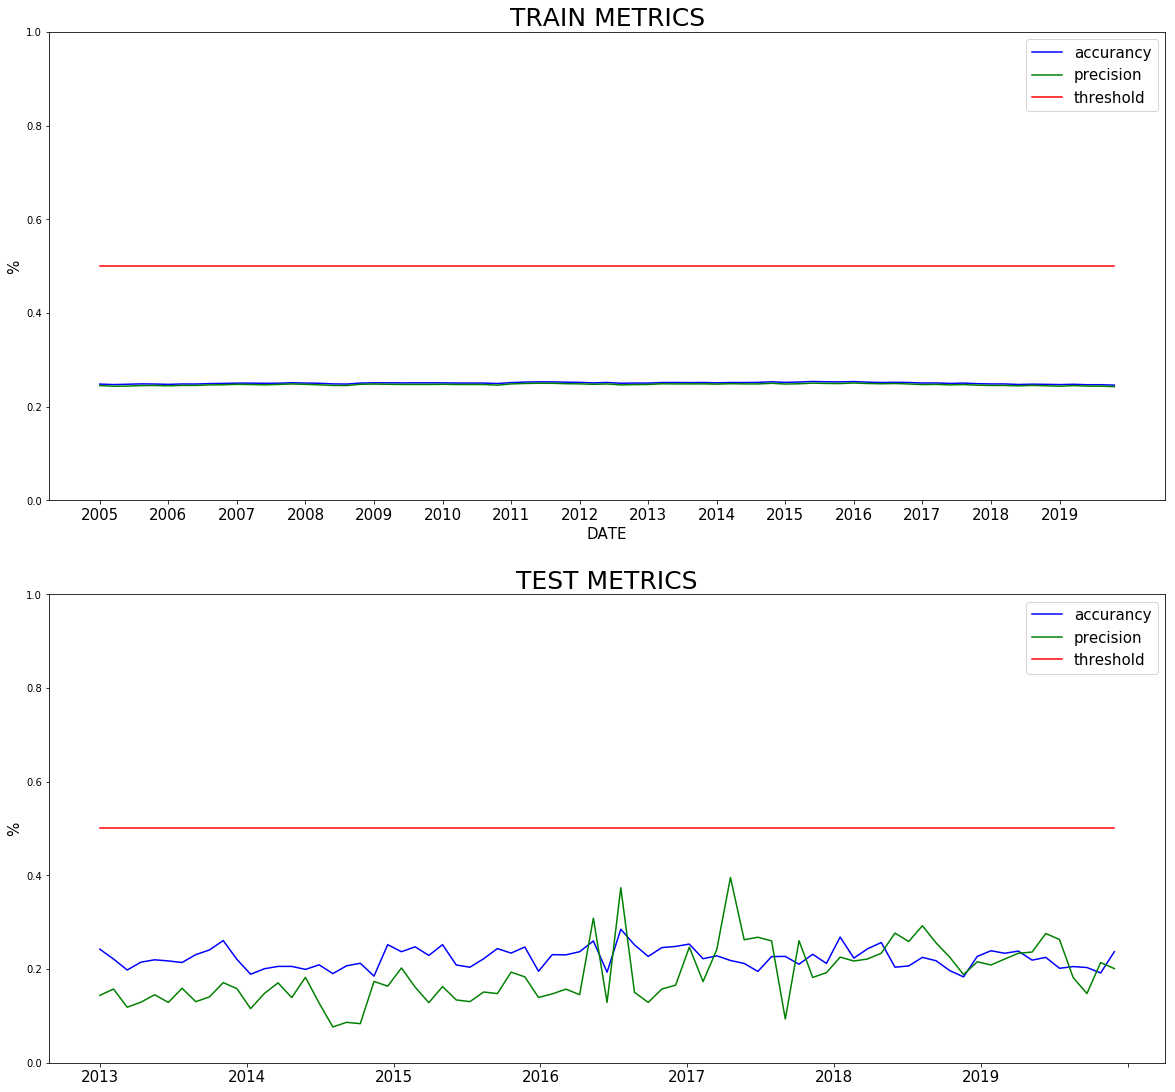

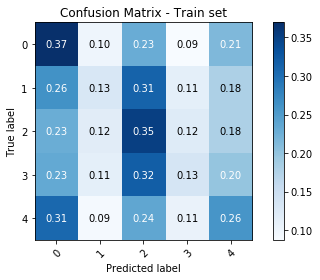

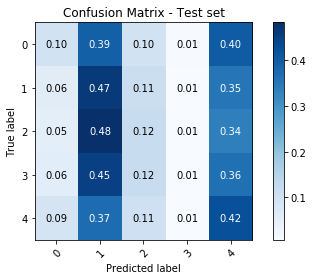

In [78]:
df=pd.read_pickle('Final.pickle')
df_alt=pd.read_pickle('Alternative_2.pickle')
c, b = time_model(RidgeClassifier(),8, df, df_alt, 100, 0.5)

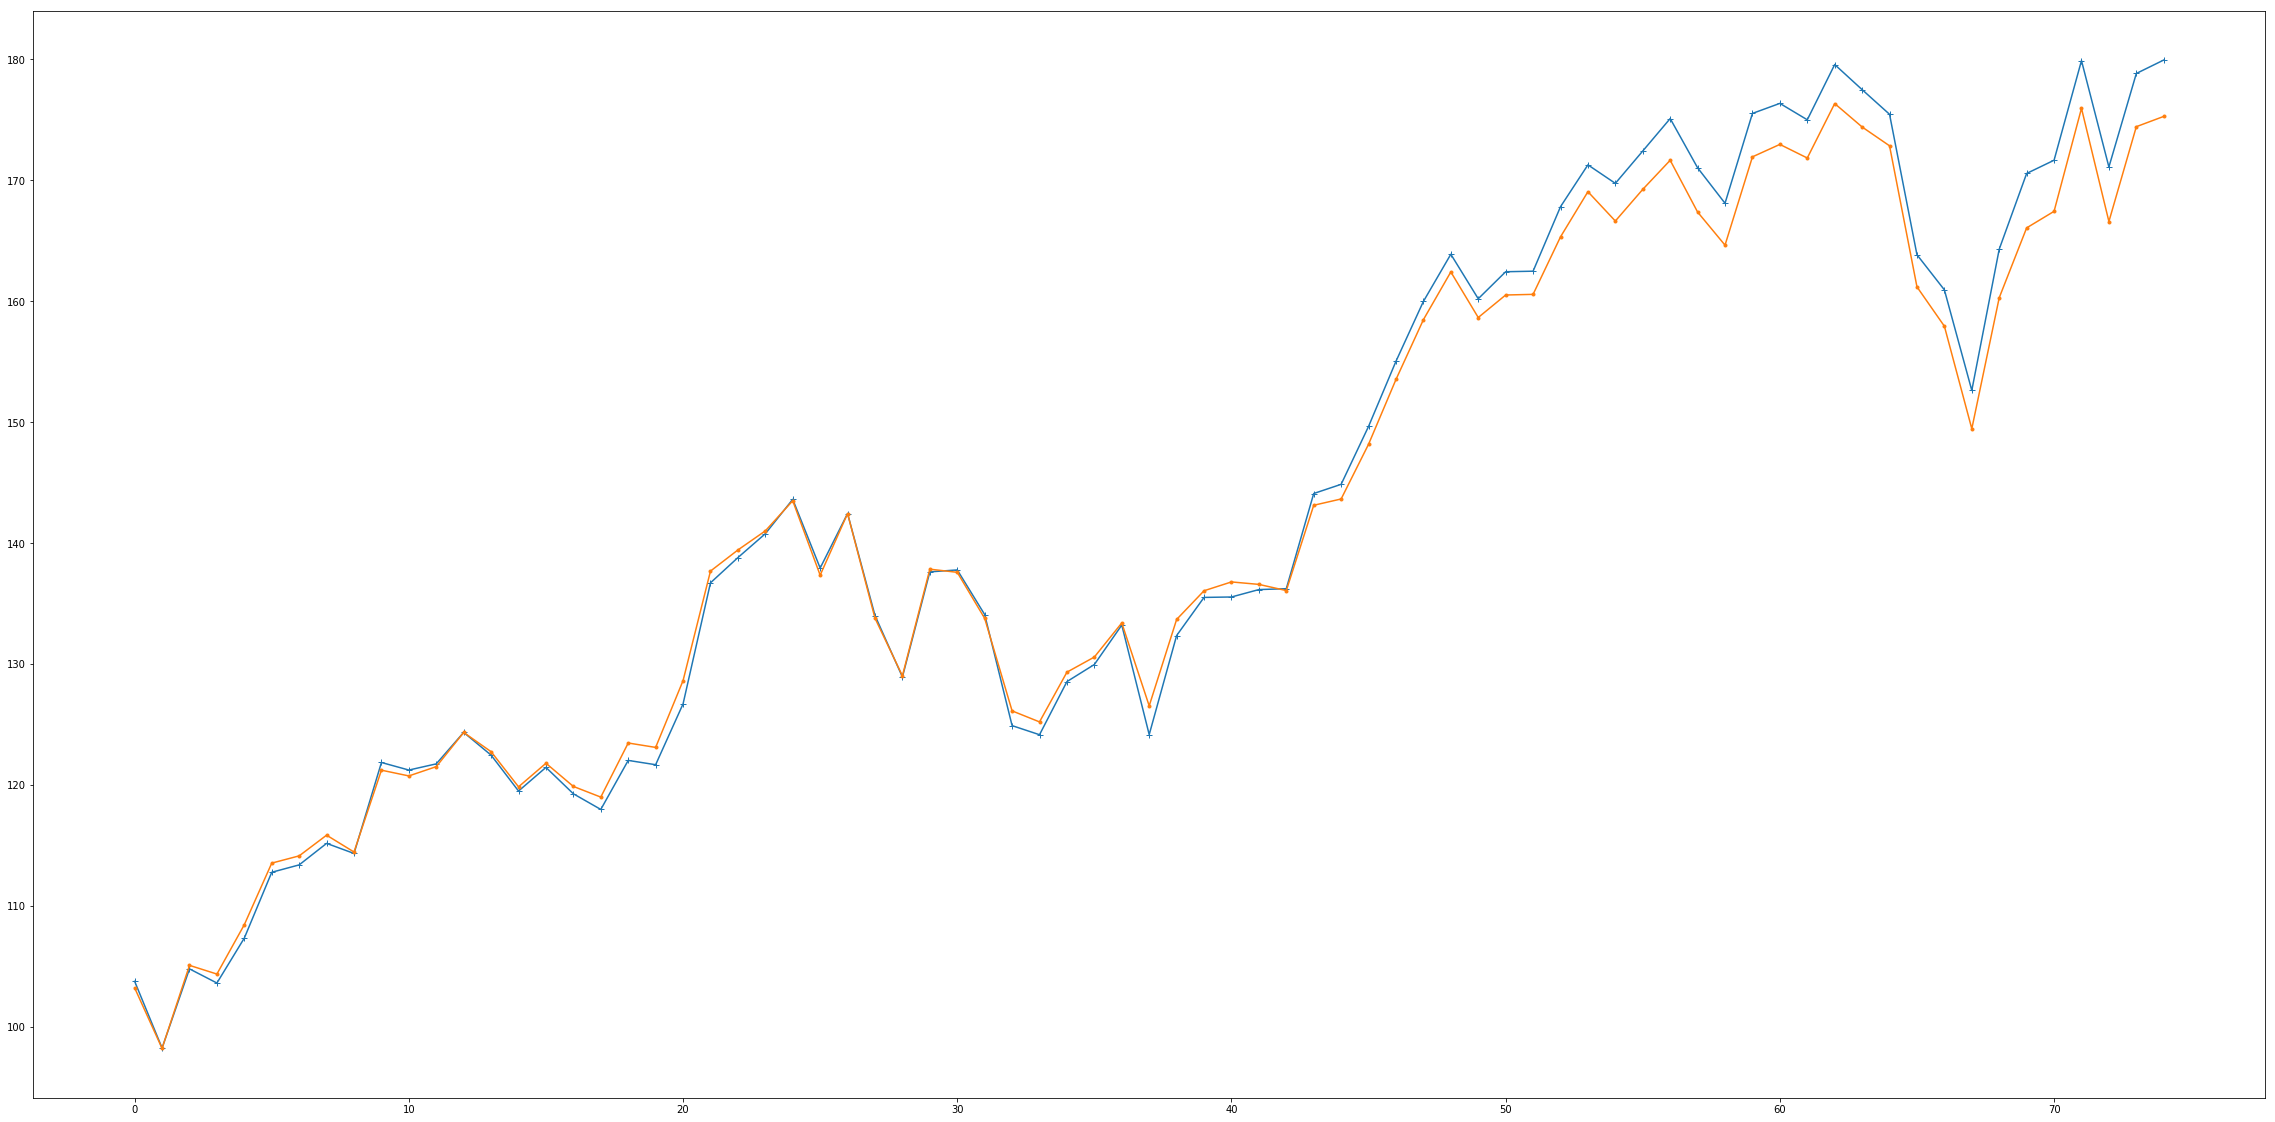

In [79]:
plt.figure(0, figsize=(40, 20))
plt.plot(c, marker='+')
plt.plot(b, marker='.')

##### c) Random Forest

train 0.2934020798741589
test 0.2239057239057239
train 0.2912151296930714
test 0.21644295302013422
train 0.2944836747535482
test 0.2063758389261745
train 0.29203663567083826
test 0.19798657718120805
train 0.292518790421255
test 0.19463087248322147
train 0.2917074535030066
test 0.20066889632107024
train 0.2912005313942106
test 0.22240802675585283
train 0.29382254230177596
test 0.22408026755852842
train 0.2926586261143157
test 0.21070234113712374
train 0.28935500786575774
test 0.22073578595317725
train 0.2907883237196294
test 0.18896321070234115
train 0.29166229680125855
test 0.2040133779264214
train 0.2916797762628911
test 0.2140468227424749
train 0.29187715219633276
test 0.22909698996655517
train 0.2939922040238424
test 0.22909698996655517
train 0.29234910590990926
test 0.17755443886097153
train 0.2915049816465653
test 0.205685618729097
train 0.2867230650912396
test 0.2036727879799666
train 0.29142707331993356
test 0.2370617696160267
train 0.2899313141199294
test 0.23076923076923078
tr

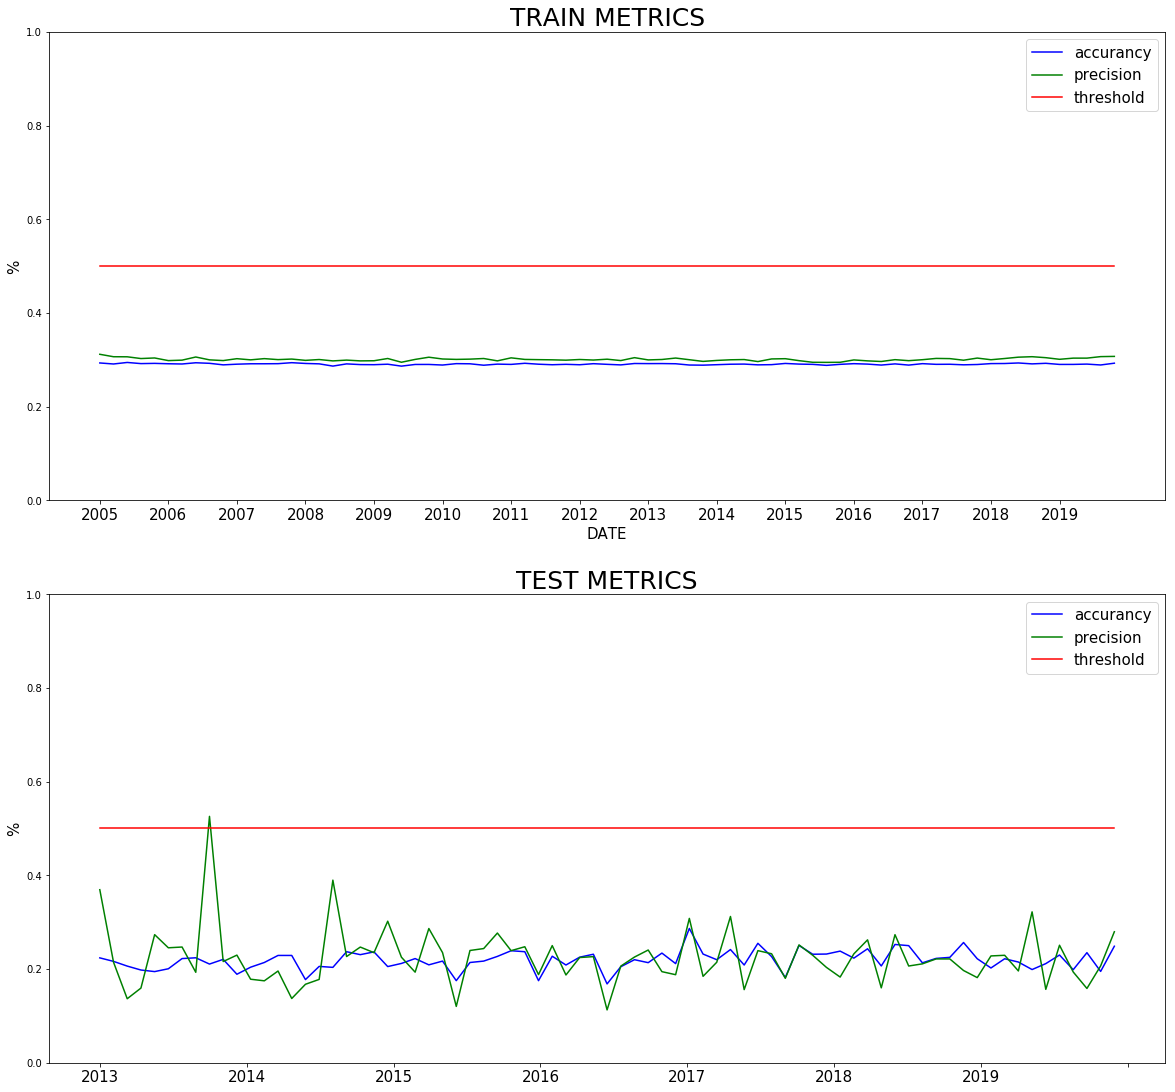

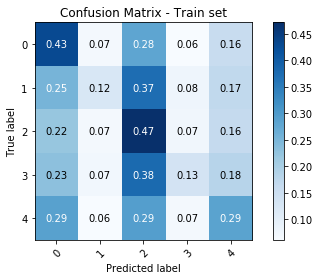

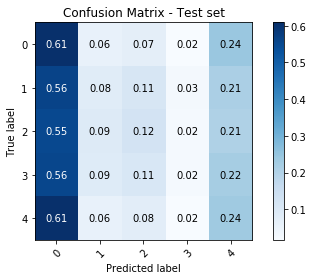

In [7]:
df=pd.read_pickle('Final.pickle')
df_alt=pd.read_pickle('Alternative_2.pickle')
time_model(RandomForestClassifier(n_estimators=50, max_leaf_nodes=50, n_jobs=-1, random_state=42),8, df, df_alt, 0.5)

##### d) Support Vector Machine

In [ ]:
df=pd.read_pickle('Final.pickle')
df_alt=pd.read_pickle('Alternative_2.pickle')
time_model(SVC(),8, df, df_alt, 0.5)

### Alternative 3

##### a) Logistic Regression

train 0.2473477234990824
test 0.22895622895622897
train 0.24715094735370202
test 0.22818791946308725
train 0.24760539746906243
test 0.19798657718120805
train 0.24769279172201636
test 0.21644295302013422
train 0.24754413564062228
test 0.23825503355704697
train 0.24764019018319117
test 0.22742474916387959
train 0.24837435323730947
test 0.21070234113712374
train 0.24776255069221087
test 0.2391304347826087
train 0.2479811221814368
test 0.23411371237458195
train 0.24803356056633455
test 0.2608695652173913
train 0.24845306764551653
test 0.21906354515050167
train 0.2492221639573501
test 0.20066889632107024
train 0.24862786226184233
test 0.21906354515050167
train 0.24877204635634254
test 0.22240802675585283
train 0.24896432379520705
test 0.20735785953177258
train 0.24898180356237654
test 0.21943048576214405
train 0.2484705471071491
test 0.20234113712374582
train 0.24814724183737677
test 0.21869782971619364
train 0.24843135541379008
test 0.22036727879799667
train 0.25017040390093853
test 0.2290

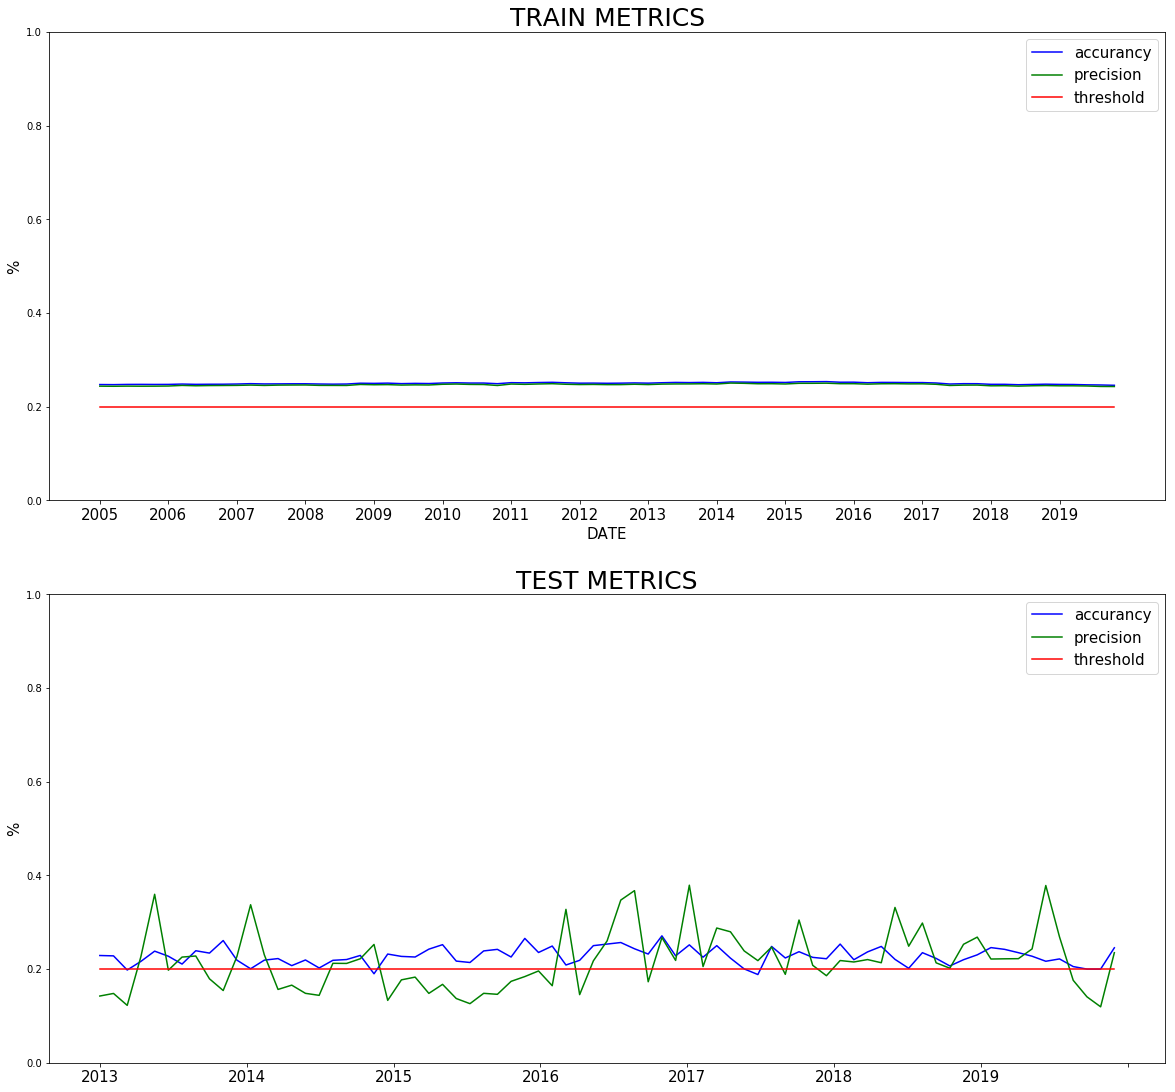

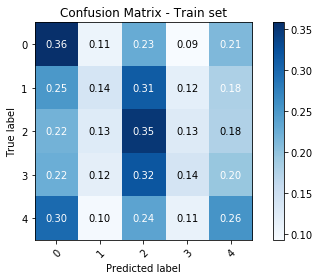

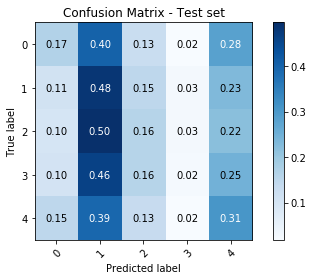

In [6]:
df=pd.read_pickle('Final.pickle')
df_alt=pd.read_pickle('Alternative_3.pickle')
c, b = time_model(LogisticRegression(),8, df, df_alt, 100, 0.2)

##### b) Ridge Classifier

train 0.25318535349121735
test 0.24074074074074073
train 0.25395022023351743
test 0.28523489932885904
train 0.25358316437111095
test 0.2332214765100671
train 0.2543871914982871
test 0.20302013422818793
train 0.2532249606712113
test 0.22483221476510068
train 0.2531464130890784
test 0.23578595317725753
train 0.25412529716123616
test 0.26421404682274247
train 0.2540204167249336
test 0.2709030100334448
train 0.25451844083202235
test 0.22408026755852842
train 0.2546757559867156
test 0.27424749163879597
train 0.25586435937773117
test 0.2157190635451505
train 0.2552176192973256
test 0.20903010033444816
train 0.25429120783079884
test 0.225752508361204
train 0.25452288975510845
test 0.26755852842809363
train 0.25431313254907445
test 0.2525083612040134
train 0.25462776835812545
test 0.24455611390284757
train 0.255409893375284
test 0.22909698996655517
train 0.25513878207369084
test 0.24040066777963273
train 0.2546010661539806
test 0.24207011686143573
train 0.2552563049443347
test 0.26923076923076

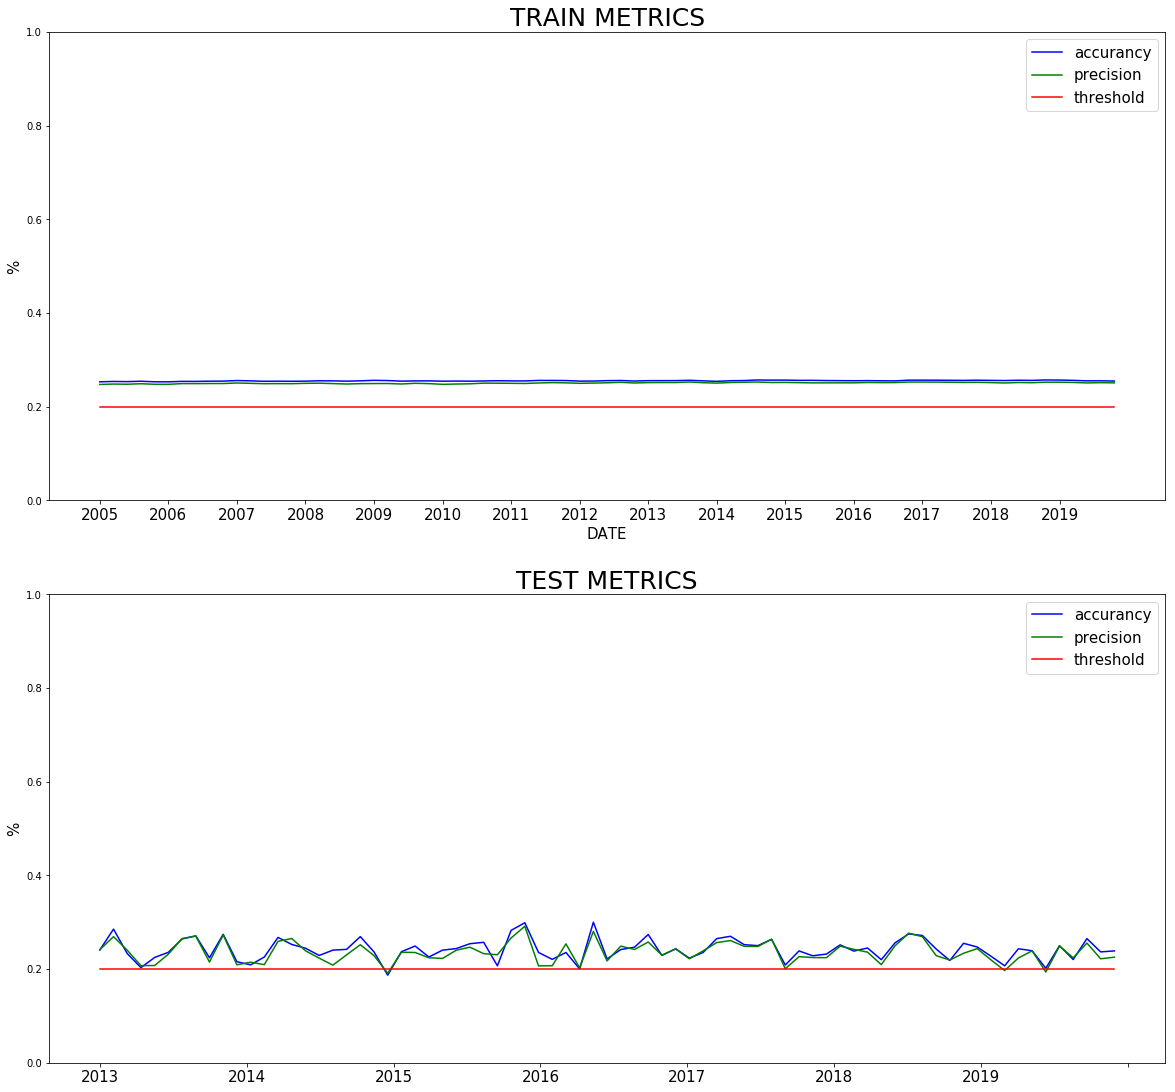

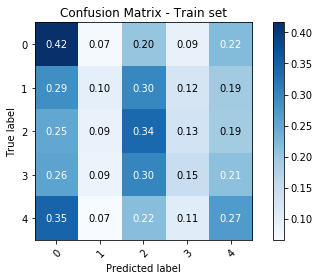

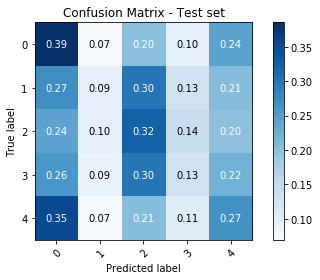

In [103]:
df=pd.read_pickle('Final.pickle')
df_alt=pd.read_pickle('Alternative_3.pickle')
c, b = time_model(RidgeClassifier(),8, df, df_alt, 100, 0.2)

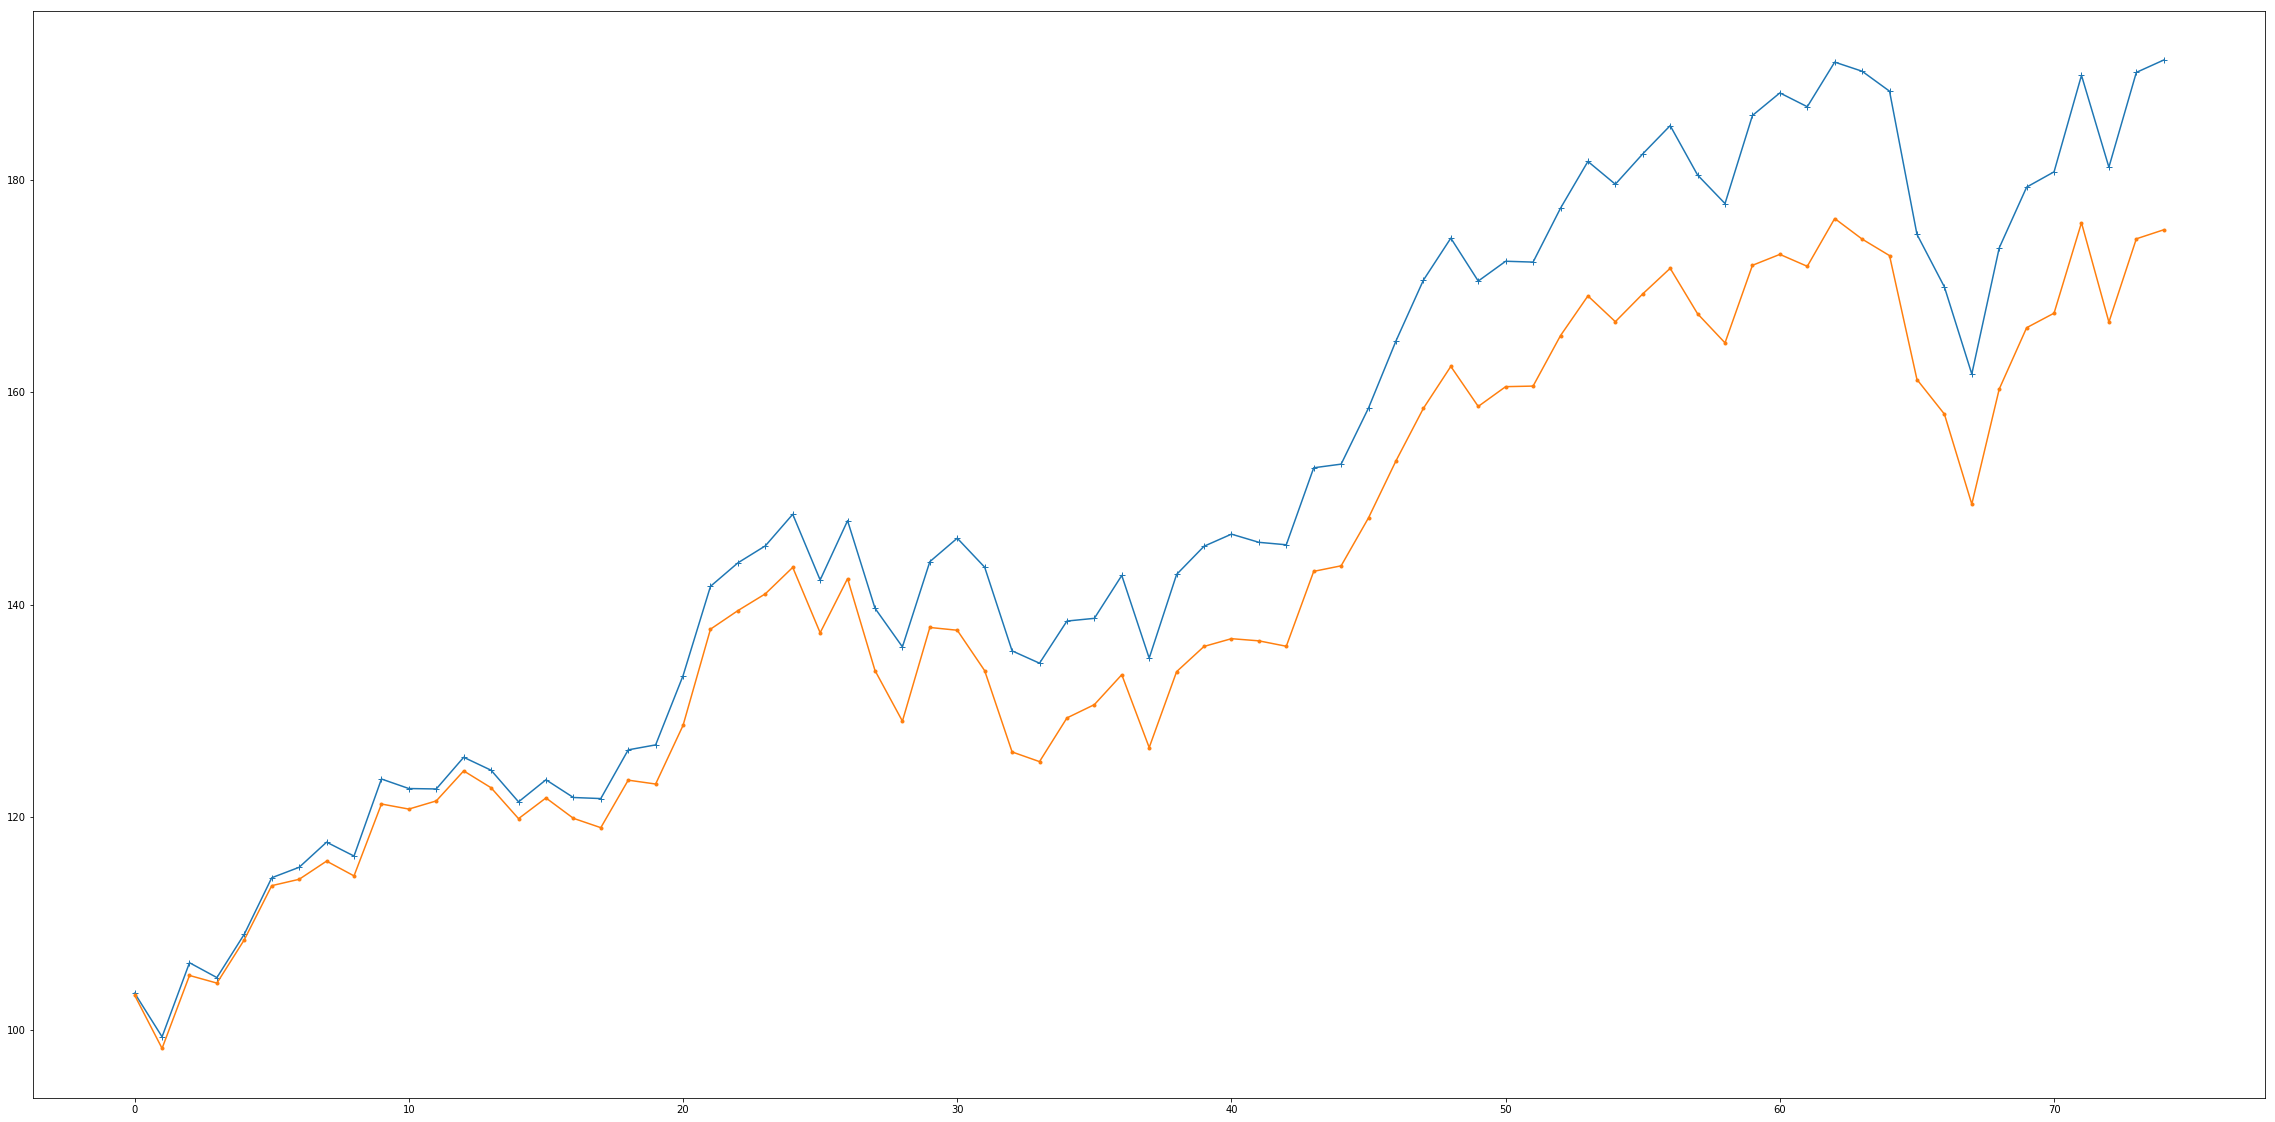

In [104]:
plt.figure(0, figsize=(40, 20))
plt.plot(c, marker='+')
plt.plot(b, marker='.')

In [86]:
(c[-1] / 100)**(1/6.5)-1

0.10492073565561322

##### c) Random Forest

train 0.2934020798741589
test 0.2239057239057239
train 0.2912151296930714
test 0.21644295302013422
train 0.2944836747535482
test 0.2063758389261745
train 0.29203663567083826
test 0.19798657718120805
train 0.292518790421255
test 0.19463087248322147
train 0.2917074535030066
test 0.20066889632107024
train 0.2912005313942106
test 0.22240802675585283
train 0.29382254230177596
test 0.22408026755852842
train 0.2926586261143157
test 0.21070234113712374
train 0.28935500786575774
test 0.22073578595317725
train 0.2907883237196294
test 0.18896321070234115
train 0.29166229680125855
test 0.2040133779264214
train 0.2916797762628911
test 0.2140468227424749
train 0.29187715219633276
test 0.22909698996655517
train 0.2939922040238424
test 0.22909698996655517
train 0.29234910590990926
test 0.17755443886097153
train 0.2915049816465653
test 0.205685618729097
train 0.2867230650912396
test 0.2036727879799666
train 0.29142707331993356
test 0.2370617696160267
train 0.2899313141199294
test 0.23076923076923078
tr

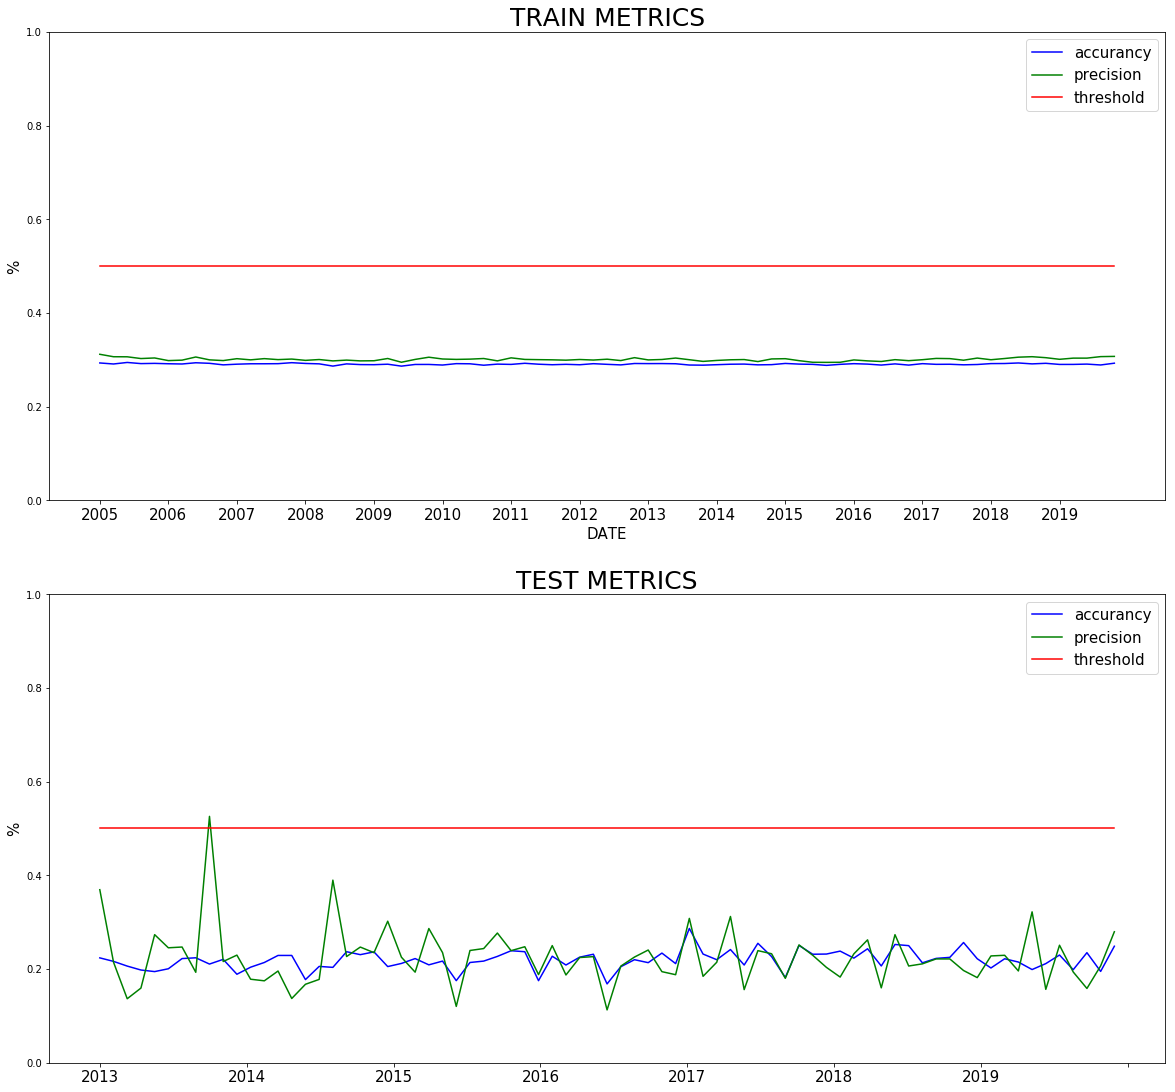

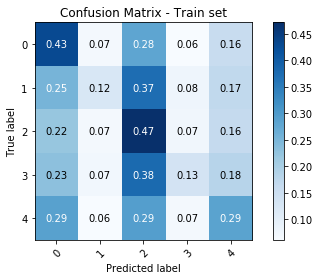

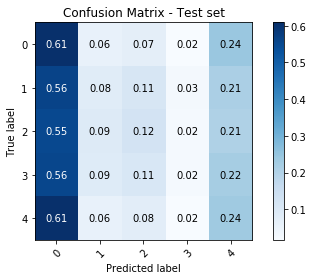

In [7]:
df=pd.read_pickle('Final.pickle')
df_alt=pd.read_pickle('Alternative_2.pickle')
time_model(RandomForestClassifier(n_estimators=50, max_leaf_nodes=50, n_jobs=-1, random_state=42),8, df, df_alt, 0.5)

##### d) Support Vector Machine

In [ ]:
df=pd.read_pickle('Final.pickle')
df_alt=pd.read_pickle('Alternative_2.pickle')
time_model(SVC(),8, df, df_alt, 0.5)

In [ ]:
dfcopy=df.copy()

In [87]:
cols=df.columns.tolist()
cols=cols[10:11] + cols[:10] + cols[11:]
dfcopy=df[cols]

In [96]:
df.columns.tolist()

['CGR',
 'REF_DATE',
 'SEDOLCHK',
 'SIMPLE_TOT_RET',
 'COMPOUND_TOT_RET',
 'FIVE_YR_VOLATILITY_M',
 'FIVE_YR_VOLATILITY_W',
 'ADY',
 'AERR',
 'AGRE',
 'APE',
 'CV3Y_EPS',
 'CV3Y_EREV_FY1',
 'CV3Y_REP_EPS',
 'CV3Y_REV_MARK',
 'CV5Y_EPS',
 'CV6M_P',
 'CV6M_PM6M',
 'DEBT_MKT_CAP',
 'DY_FWD',
 'DY_TRL',
 'EBIT_SALES',
 'ECM',
 'EEREV',
 'EPS_SIGMA',
 'EPSDISP',
 'EREV',
 'F2GRE',
 'FDY',
 'FERR',
 'FGRE',
 'FPE',
 'FWD_ECM',
 'FWD_GRE',
 'LRE',
 'MKT_CAP_SALES',
 'NM',
 'PB',
 'PM6MBIS',
 'PM6MTRIS',
 'PCF',
 'PCTCHG_DPS',
 'PCTCHG_EBIT',
 'PCTCHG_EBIT_MARGIN',
 'PCTCHG_EBITDA',
 'PCTCHG_EQUITY',
 'PCTCHG_NET_DEBT',
 'PCTCHG_NM',
 'PCTCHG_PRE_TAX_PROFIT',
 'PCTCHG_ROE',
 'PCTCHG_SALES',
 'PCTCHG_UL_SALES',
 'PE_FWD',
 'PE_TRL',
 'PM6M',
 'RC1MEEREV',
 'RC1MEREV',
 'REC_MARK_1M',
 'REC_MARK_3M',
 'REV_MARK_1M',
 'REV_MARK_3M',
 'REV_STD_MARK',
 'ROE',
 'TRL_ECM',
 'TRL_GRE',
 'TURNOVER_1M',
 'UL_SALES',
 'PB/PCF1',
 'PB/PCF2',
 'ICB_INDUSTRY_NUM',
 'ICB_SECTOR_NUM',
 'sector_1',
 'sector_80

In [ ]:
dfcopy.columns.tolist()

In [ ]:
dfcopy2=df.copy()

In [92]:
df=dfcopy

In [116]:

coldropped=dropped.columns
X_plain_train = np.c_[dropped]
y_plain_train = np.c_[df['COMPOUND_TOT_RET']]
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled_train = min_max_scaler.fit_transform(X_plain_train)
y_scaled_train = min_max_scaler.fit_transform(y_plain_train)
X_train = X_scaled_train
y_train = y_plain_train
#X_plain_test = np.c_[df[test_list[i + learning_period + 1][0]:(test_list[i + learning_period + 1][1] + 1)].drop(['REF_DATE','SEDOLCHK','SIMPLE_TOT_RET','COMPOUND_TOT_RET','YEAR','MONTH','ICB_INDUSTRY_NUM', 'ICB_SECTOR_NUM'], axis = 1)]
#y_plain_test = np.c_[df[test_list[i + learning_period + 1][0]:(test_list[i + learning_period + 1][1] + 1)]['COMPOUND_TOT_RET']]
#min_max_scaler = preprocessing.MinMaxScaler()
#X_scaled_test = min_max_scaler.fit_transform(X_plain_test)
#y_scaled_test = min_max_scaler.fit_transform(y_plain_test)

#            X_test = X_scaled_test
#            y_test = y_plain_test

#clf = model
clf = RandomForestRegressor(n_estimators=50, max_leaf_nodes=10, n_jobs=-1, random_state=42)
clf.fit(X_train, y_train)
            #print('train: ',i)
for i,j in zip(coldropped,clf.feature_importances_):
    print('feature_importances: ',i,j)

y_train_predict = clf.predict(X_train)
print (r2_score(y_train,y_train_predict))
#y_train_list.append(y_train)
#y_train_predict_list.append(y_train_predict)
#y_test_predict = clf.predict(X_test)
#y_test_list.append(y_test)
#y_test_predict_list.append(y_test_predict)  # List of all the predictions

feature_importances:  FIVE_YR_VOLATILITY_M 0.42780133348407756
feature_importances:  FIVE_YR_VOLATILITY_W 0.0035063761004597597
feature_importances:  ADY 0.005115683174490166
feature_importances:  AERR 0.0009220271511000805
feature_importances:  AGRE 0.0012976135149678158
feature_importances:  APE 0.027689015098682716
feature_importances:  CGR 0.01518941273473287
feature_importances:  CV3Y_EPS 0.0010487337065742401
feature_importances:  CV3Y_EREV_FY1 0.0
feature_importances:  CV3Y_REP_EPS 0.0
feature_importances:  CV3Y_REV_MARK 0.007318667280900576
feature_importances:  CV5Y_EPS 0.005193612615241493
feature_importances:  CV6M_P 0.04376476287268742
feature_importances:  CV6M_PM6M 0.001038152631032443
feature_importances:  DEBT_MKT_CAP 0.0065584549795161965
feature_importances:  DY_FWD 0.003436176769575067
feature_importances:  DY_TRL 0.0
feature_importances:  EBIT_SALES 0.0021570392612118394
feature_importances:  ECM 0.0
feature_importances:  EEREV 0.0023312182240407117
feature_importan

In [105]:
clf.feature_importances_.

0.31781686180411645

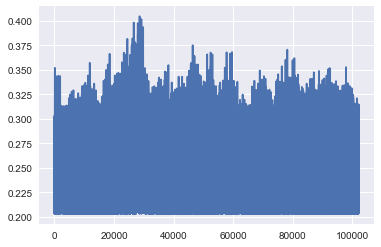

In [117]:
plt.plot(y_train_predict)

In [ ]:
plt.plot(y_train)

In [ ]:
y_train.argmax()

In [ ]:
df[y_train.argmax():y_train.argmax()+1]

### Alternative 1

#### Rolling training window = 8 years

In [ ]:
time_model(LogisticRegression(),8)

In [ ]:
time_model(RidgeClassifier(),8)

In [ ]:
time_model(RandomForestClassifier(n_estimators=50, max_leaf_nodes=10, n_jobs=-1, random_state=42),8)        

In [ ]:
time_model(RandomForestRegressor(n_estimators=50, max_leaf_nodes=10, n_jobs=-1, random_state=42),8)

#### Rolling training window = 5 years

In [ ]:
time_model(LogisticRegression(),5)

In [ ]:
time_model(RidgeClassifier(),5)

In [ ]:
time_model(RandomForestClassifier(n_estimators=50, max_leaf_nodes=10, n_jobs=-1, random_state=42),5)        


#### Rolling training window = 2 years

In [ ]:
time_model(LogisticRegression(),2)

In [ ]:
time_model(RidgeClassifier(),2)

In [ ]:
time_model(RandomForestClassifier(n_estimators=50, max_leaf_nodes=10, n_jobs=-1, random_state=42),2)        


### Alternative 2

#### Rolling training window = 8 years

In [ ]:
time_model(LogisticRegression(),8)

In [ ]:
time_model(RidgeClassifier(),8)

In [ ]:
time_model(RandomForestClassifier(n_estimators=50, max_leaf_nodes=50, n_jobs=-1, random_state=42),8)        


#### Rolling training window = 5 years

In [ ]:
time_model(LogisticRegression(),5)

In [ ]:
time_model(RidgeClassifier(),5)

In [ ]:
time_model(RandomForestClassifier(n_estimators=50, max_leaf_nodes=50, n_jobs=-1, random_state=42),5)        


#### Rolling training window = 2 years

In [ ]:
time_model(LogisticRegression(),2)

In [ ]:
time_model(RidgeClassifier(),2)

In [ ]:
time_model(RandomForestClassifier(n_estimators=50, max_leaf_nodes=50, n_jobs=-1, random_state=42),2)        


### Alternative 3

#### Rolling training window = 8 years

In [ ]:
time_model(LogisticRegression(),8)

In [ ]:
df.head()

In [ ]:
df=df_backup.copy()

In [ ]:
time_model(RidgeClassifier(),8)

In [ ]:
time_model(RandomForestClassifier(n_estimators=50, max_leaf_nodes=10, n_jobs=-1, random_state=42),8)        


#### Rolling training window = 5 years

In [ ]:
time_model(LogisticRegression(),5)

In [ ]:
time_model(RidgeClassifier(),5)

In [ ]:
time_model(RandomForestClassifier(n_estimators=50, max_leaf_nodes=10, n_jobs=-1, random_state=42),5)        


#### Rolling training window = 2 years

In [ ]:
time_model(LogisticRegression(),2)

In [ ]:
time_model(RidgeClassifier(),2)

In [ ]:
time_model(RandomForestClassifier(n_estimators=50, max_leaf_nodes=10, n_jobs=-1, random_state=42),2)        
